<a href="https://colab.research.google.com/github/seismosmsr/machine_learning/blob/main/gedi_analysis_HJA_9_14_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [3]:
# while(TRUE){}

In [4]:
# drive_deauth()
# drive_auth(use_oob = TRUE, cache = FALSE)

In [5]:
# GEDI data
# https://drive.google.com/file/d/14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4/view?usp=drive_link

# Landtrendr data
# https://drive.google.com/file/d/1FrN1tUojGV80f3kDtmezsFsvLabIoGiW/view?usp=drive_link

# HUC 8
# https://drive.google.com/file/d/1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z/view?usp=drive_link

# HUC 10
# https://drive.google.com/file/d/1m86VWKw3nys-oY931eq9dC6xv0cEfs4a/view?usp=drive_link

# HUC 12
# https://drive.google.com/file/d/18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL/view?usp=drive_link

# GEDI vectorized by YOD, Queen's rule.
# https://drive.google.com/file/d/1miOMqCh081yceVUfVVOL5JtxpKUgBO-2/view?usp=drive_link

In [6]:
drive_download(file = as_id('1FrN1tUojGV80f3kDtmezsFsvLabIoGiW'), path =  '/content/HJA_LandTrendr_84_23.tif', overwrite = FALSE)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=0f95d0b293ef5923c0202bcb887512a5&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWRldTVCVVpWYkZVOWlnVXB4V3Y0RWdkM3FIdHJpd2JjdzZyM0tTSzdDbU8xRm9JQmE4Mk1JeDA3ampicE5ENl91dS0wQSIsInN0YXRlIjoiMGY5NWQwYjI5M2VmNTkyM2MwMjAyYmNiODg3NTEyYTUifQ==


File downloaded:

• HJA_LandTrendr_84_23_2.tif <id: 1FrN1tUojGV80f3kDtmezsFsvLabIoGiW>

Saved locally as:

• /content/HJA_LandTrendr_84_23.tif



In [7]:
drive_download(file = as_id('14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4'), path =  '/content/HJA_gedi.gpkg', overwrite = TRUE)

File downloaded:

• HJA_GEDI_4.gpkg <id: 14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4>

Saved locally as:

• /content/HJA_gedi.gpkg



In [8]:
drive_download(file = as_id('1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z'), path =  '/content/huc_8.gpkg', overwrite = TRUE)
drive_download(file = as_id('1m86VWKw3nys-oY931eq9dC6xv0cEfs4a'), path =  '/content/huc_10.gpkg', overwrite = TRUE)
drive_download(file = as_id('18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL'), path =  '/content/huc_12.gpkg', overwrite = TRUE)

File downloaded:

• WBDHU8.gpkg <id: 1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z>

Saved locally as:

• /content/huc_8.gpkg

File downloaded:

• WBDHU10.gpkg <id: 1m86VWKw3nys-oY931eq9dC6xv0cEfs4a>

Saved locally as:

• /content/huc_10.gpkg

File downloaded:

• WBDHU12.gpkg <id: 18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL>

Saved locally as:

• /content/huc_12.gpkg



In [9]:
# https://drive.google.com/file/d/1miOMqCh081yceVUfVVOL5JtxpKUgBO-2/view?usp=drive_link
drive_download(file = as_id('1miOMqCh081yceVUfVVOL5JtxpKUgBO-2'), path =  '/content/gedi_vector.gpkg', overwrite = TRUE)

File downloaded:

• yod_vector.gpkg <id: 1miOMqCh081yceVUfVVOL5JtxpKUgBO-2>

Saved locally as:

• /content/gedi_vector.gpkg



In [10]:
# https://drive.google.com/file/d/1qpVnW4V_qbE1rAR4wAq1yMNRIZniVFsa/view?usp=drive_link
drive_download(file = as_id('1qpVnW4V_qbE1rAR4wAq1yMNRIZniVFsa'), path =  '/content/conus_2003.tif', overwrite = TRUE)

File downloaded:

• conus_forest_biomass_mg_per_ha.img <id: 1qpVnW4V_qbE1rAR4wAq1yMNRIZniVFsa>

Saved locally as:

• /content/conus_2003.tif



In [11]:
# https://drive.google.com/file/d/1X-D5SIaH18skJ5Wshzge1BxlvRZOOWCh/view?usp=drive_link

drive_download(file = as_id('1X-D5SIaH18skJ5Wshzge1BxlvRZOOWCh'), path =  '/content/conus_2016.tif', overwrite = TRUE)

File downloaded:

• biomass_k10_2016.tif <id: 1X-D5SIaH18skJ5Wshzge1BxlvRZOOWCh>

Saved locally as:

• /content/conus_2016.tif



In [12]:
# https://drive.google.com/file/d/1HGLy-drZfu5wmWW9xVbCkQjHGdqFbGF4/view?usp=drive_link

drive_download(file = as_id('1HGLy-drZfu5wmWW9xVbCkQjHGdqFbGF4'), path =  '/content/hja_2008.tif', overwrite = TRUE)

File downloaded:

• AGLB_2008.tif <id: 1HGLy-drZfu5wmWW9xVbCkQjHGdqFbGF4>

Saved locally as:

• /content/hja_2008.tif



In [13]:
# https://drive.google.com/file/d/1MXa0GC0bWAbMSVpR7Gpc4cOFyCRxpJfI/view?usp=drive_link
drive_download(file = as_id('1MXa0GC0bWAbMSVpR7Gpc4cOFyCRxpJfI'), path =  '/content/wnf_history.gpkg', overwrite = TRUE)

# https://drive.google.com/file/d/1PFW8YtCJ-Afxb7XTM94j7IcZDQc6r3FS/view?usp=drive_link
drive_download(file = as_id('1PFW8YtCJ-Afxb7XTM94j7IcZDQc6r3FS'), path =  '/content/fire_history.gpkg', overwrite = TRUE)

# https://drive.google.com/file/d/1igHhc0FY2TBm7DMHNWMoqTbLHv2qvgms/view?usp=drive_link
drive_download(file = as_id('1igHhc0FY2TBm7DMHNWMoqTbLHv2qvgms'), path =  '/content/harvest_history.gpkg', overwrite = TRUE)

# https://drive.google.com/file/d/1XluoE3kGZ1u5-az0EmimhRpe__qzApM4/view?usp=drive_link
drive_download(file = as_id('1XluoE3kGZ1u5-az0EmimhRpe__qzApM4'), path =  '/content/aoi_boundary.geojson', overwrite = TRUE)

File downloaded:

• clip_wnfveg6.gpkg <id: 1MXa0GC0bWAbMSVpR7Gpc4cOFyCRxpJfI>

Saved locally as:

• /content/wnf_history.gpkg

File downloaded:

• Fire_History_HJA.gpkg <id: 1PFW8YtCJ-Afxb7XTM94j7IcZDQc6r3FS>

Saved locally as:

• /content/fire_history.gpkg

File downloaded:

• HJA_Harvest_Sites.gpkg <id: 1igHhc0FY2TBm7DMHNWMoqTbLHv2qvgms>

Saved locally as:

• /content/harvest_history.gpkg

File downloaded:

• hja_boundary.geojson <id: 1XluoE3kGZ1u5-az0EmimhRpe__qzApM4>

Saved locally as:

• /content/aoi_boundary.geojson



In [14]:
while(TRUE){}

In [3]:
hja_2008_tif <- stack('/content/hja_2008.tif')
conus_2003_tif <- stack('/content/conus_2003.tif')
conus_2016_tif  <- stack('/content/conus_2016.tif')

In [4]:
landtrendr_tif <- stack('/content/HJA_LandTrendr_84_23.tif')

In [5]:
gedi_vec_gpkg <- st_read('/content/gedi_vector.gpkg') %>% st_transform(st_crs('EPSG:4326'))

Multiple layers are present in data source /content/gedi_vector.gpkg, reading layer `vectorized'.
Use `st_layers' to list all layer names and their type in a data source.
Set the `layer' argument in `st_read' to read a particular layer.


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
“automatically selected the first layer in a data source containing more than one.”


Reading layer `vectorized' from data source `/content/gedi_vector.gpkg' using driver `GPKG'
Simple feature collection with 478987 features and 4 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85836 xmax: -121.7595 ymax: 44.90912
Geodetic CRS:  WGS 84


In [9]:
gedi_vec_gpkg$gedi_vec_id <- 1:nrow(gedi_vec_gpkg)

In [49]:
huc_8_gpgk <- st_read('/content/huc_8.gpkg') %>% st_transform(st_crs('EPSG:4326'))
huc_10_gpgk <- st_read('/content/huc_10.gpkg')  %>% st_transform(st_crs('EPSG:4326'))
huc_12_gpgk <- st_read('/content/huc_12.gpkg')  %>% st_transform(st_crs('EPSG:4326'))

Reading layer `wbdhu8_central_oregon__wdb_oregon_state_gdb__wbdhu8' from data source `/content/huc_8.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 15 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu10' from data source 
  `/content/huc_10.gpkg' using driver `GPKG'
Simple feature collection with 27 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu12' from data source 
  `/content/huc_12.gpkg' using driver `GPKG'
Simple feature collection with 161 features and 20 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83


In [57]:
OR_lm_sf <- st_read('/content/oregon_land_management.gpkg') %>% st_transform(st_crs('EPSG:4326')) %>% st_collection_extract('POLYGON') %>% st_make_valid()
OR_lo_sf <- st_read('/content/private_industrial_ownership_oregon.gpkg')  %>% st_transform(st_crs('EPSG:4326')) %>% st_collection_extract('POLYGON') %>% st_make_valid()
OR_fire_sf <- st_read('/content/fire_history_oregon_2.gpkg')  %>% st_transform(st_crs('EPSG:4326')) %>% st_make_valid()

Reading layer `oregon_land_management' from data source 
  `/content/oregon_land_management.gpkg' using driver `GPKG'
Simple feature collection with 31994 features and 10 fields (with 20 geometries empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -180 ymin: -90 xmax: 180 ymax: 90
Geodetic CRS:  WGS 84


Warning message in st_collection_extract.sf(., "POLYGON"):
“x is already of type POLYGON.”


Reading layer `private_industrial_ownership' from data source 
  `/content/private_industrial_ownership_oregon.gpkg' using driver `GPKG'
Simple feature collection with 511 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -124.5044 ymin: 41.99325 xmax: -117.0636 ymax: 46.20265
Geodetic CRS:  WGS 84


Warning message in st_collection_extract.sf(., "POLYGON"):
“x is already of type POLYGON.”


Reading layer `buffered' from data source `/content/fire_history_oregon_2.gpkg' using driver `GPKG'
Simple feature collection with 6858 features and 23 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -13860290 ymin: 5106055 xmax: -12951640 ymax: 6304889
Projected CRS: WGS 84 / Pseudo-Mercator


In [65]:
huc_10_gpgk %>% head

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

,OBJECTID,TNMID,MetaSourceID,SourceDataDesc,SourceOriginator,SourceFeatureID,LoadDate,GNIS_ID,AreaAcres,AreaSqKm,States,HUC10,Name,HUType,HUMod,Shape_Length,Shape_Area,geom
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,522,{6656248D-5F90-4BB6-B5EA-484742B9AC17},NA,NA,NA,NA,2013-01-18 08:56:26,NA,69325.69,280.55,OR,1709000501,Breitenbush River,S,NA,1.1431569,0.03189289,MULTIPOLYGON (((-122.011 44...
2,523,{ED39C5F1-2255-45AE-8A3D-61F464F52D80},NA,NA,NA,NA,2013-01-18 08:56:26,NA,146500.78,592.87,OR,1709000502,Headwaters North Santiam River,S,NA,1.4822647,0.06721638,MULTIPOLYGON (((-122.011 44...
3,524,{44AE01AA-389C-49BB-A28F-FE5E851F5FCD},NA,NA,NA,NA,2013-01-18 08:56:26,NA,71405.72,288.97,OR,1709000503,Upper North Santiam River,S,NA,1.0857123,0.03279917,MULTIPOLYGON (((-122.169 44...
4,525,{EF47FA30-5446-435D-8F82-50A0FBFB46B1},NA,NA,NA,NA,2013-01-18 08:56:26,NA,56683.51,229.39,OR,1709000504,Middle North Santiam River,S,NA,0.9704299,0.02606221,MULTIPOLYGON (((-122.3109 4...
5,526,{BD325AA6-5275-4CB5-8A3F-6148A3B13DC2},NA,NA,NA,NA,2013-01-18 08:56:26,NA,72404.79,293.01,OR,1709000505,Little North Santiam River,S,NA,1.2658293,0.03334033,MULTIPOLYGON (((-122.2548 4...
6,527,{2FFB86E8-7356-4DCA-B1F0-D27FF53234D1},NA,NA,NA,NA,2013-01-18 08:56:26,NA,72785.23,294.55,OR,1709000506,Lower North Santiam River,S,NA,1.6595153,0.03348020,MULTIPOLYGON (((-122.5408 4...


Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.1609 ymin: 44.70125 xmax: -121.7597 ymax: 44.84949
Geodetic CRS:  WGS 84
  OBJECTID                                  TNMID MetaSourceID SourceDataDesc
1      522 {6656248D-5F90-4BB6-B5EA-484742B9AC17}         <NA>           <NA>
  SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
1             <NA>            <NA> 2013-01-18 08:56:26      NA  69325.69
  AreaSqKm States      HUC10              Name HUType HUMod Shape_Length
1   280.55     OR 1709000501 Breitenbush River      S  <NA>     1.143157
  Shape_Area                           geom
1 0.03189289 MULTIPOLYGON (((-122.011 44...


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%
Deleting source `/content/HUC_Intersection_Set/huc_10_1.gpkg' failed
Writing layer `huc_10_1' to data source 
  `/content/HUC_Intersection_Set/huc_10_1.gpkg' using driver `GPKG'
Writing 94451 features with 40 fields and geometry type Point.
[1] "Finished HUC  Breitenbush River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.1787 ymin: 44.46379 xmax: -121.7935 ymax: 44.74952
Geodetic CRS:  WGS 84
  OBJECTID                                  TNMID MetaSourceID SourceDataDesc
2      523 {ED39C5F1-2255-45AE-8A3D-61F464F52D80}         <NA>           <NA>
  SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
2             <NA>            <NA> 2013-01-18 08:56:26      NA  146500.8
  AreaSqKm States      HUC10                           Name HUType HUMod
2   592.87     OR 1709000502 Headwaters North Santiam River      S

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


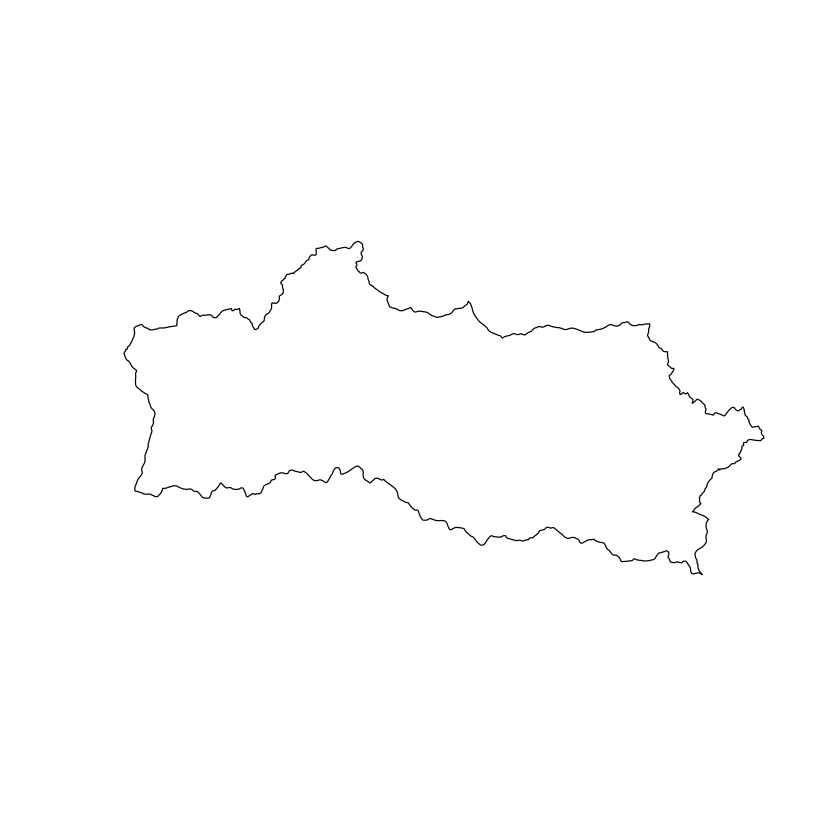

Deleting source `/content/HUC_Intersection_Set/huc_10_2.gpkg' failed
Writing layer `huc_10_2' to data source 
  `/content/HUC_Intersection_Set/huc_10_2.gpkg' using driver `GPKG'
Writing 224063 features with 40 fields and geometry type Point.
[1] "Finished HUC  Headwaters North Santiam River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.3292 ymin: 44.5631 xmax: -122.0442 ymax: 44.80124
Geodetic CRS:  WGS 84
  OBJECTID                                  TNMID MetaSourceID SourceDataDesc
3      524 {44AE01AA-389C-49BB-A28F-FE5E851F5FCD}         <NA>           <NA>
  SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
3             <NA>            <NA> 2013-01-18 08:56:26      NA  71405.72
  AreaSqKm States      HUC10                      Name HUType HUMod
3   288.97     OR 1709000503 Upper North Santiam River      S  <NA>
  Shape_Length Shape_Area                           geom
3     1.08571

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


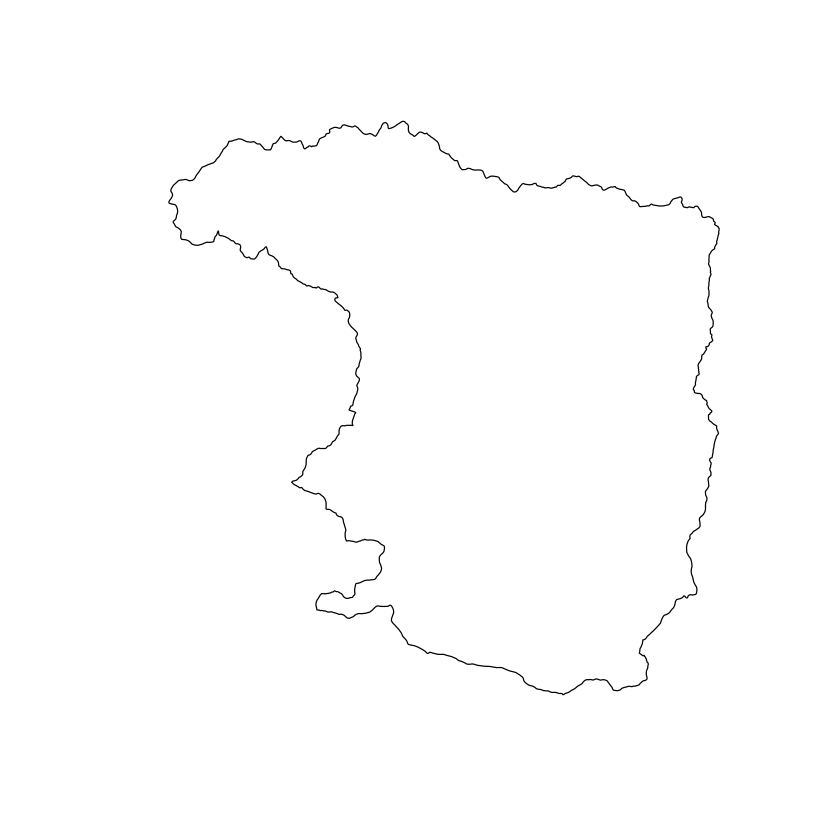

Deleting source `/content/HUC_Intersection_Set/huc_10_3.gpkg' failed
Writing layer `huc_10_3' to data source 
  `/content/HUC_Intersection_Set/huc_10_3.gpkg' using driver `GPKG'
Writing 94266 features with 40 fields and geometry type Point.
[1] "Finished HUC  Upper North Santiam River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.6131 ymin: 44.66184 xmax: -122.2716 ymax: 44.79515
Geodetic CRS:  WGS 84
  OBJECTID                                  TNMID MetaSourceID SourceDataDesc
4      525 {EF47FA30-5446-435D-8F82-50A0FBFB46B1}         <NA>           <NA>
  SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
4             <NA>            <NA> 2013-01-18 08:56:26      NA  56683.51
  AreaSqKm States      HUC10                       Name HUType HUMod
4   229.39     OR 1709000504 Middle North Santiam River      S  <NA>
  Shape_Length Shape_Area                           geom
4    0.9704299 0

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


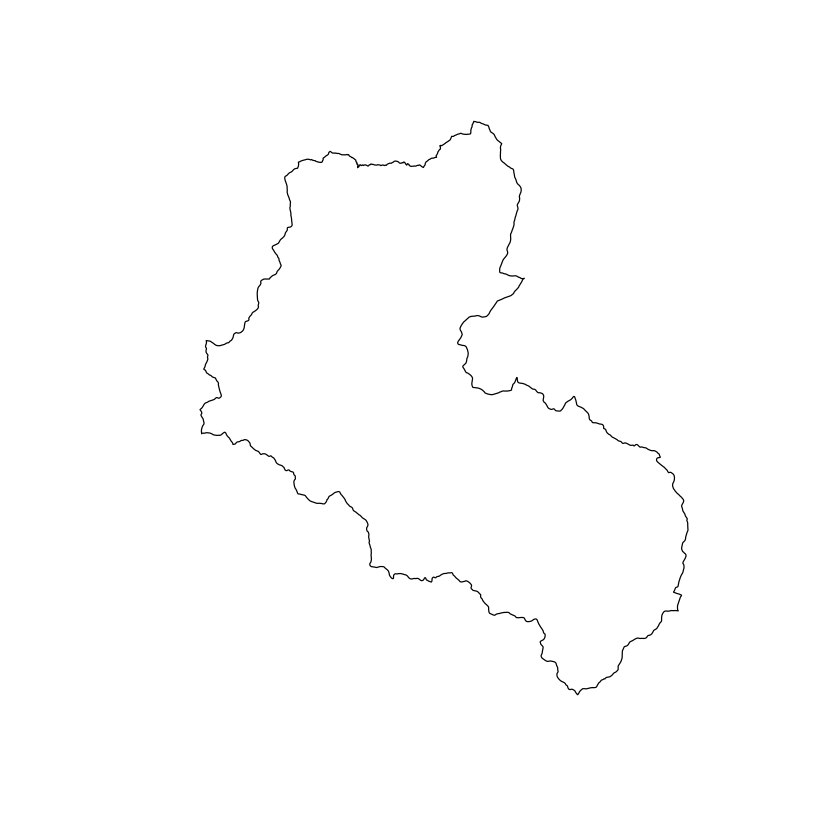

Deleting source `/content/HUC_Intersection_Set/huc_10_4.gpkg' failed
Writing layer `huc_10_4' to data source 
  `/content/HUC_Intersection_Set/huc_10_4.gpkg' using driver `GPKG'
Writing 77090 features with 40 fields and geometry type Point.
[1] "Finished HUC  Middle North Santiam River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.6094 ymin: 44.77703 xmax: -122.1314 ymax: 44.89995
Geodetic CRS:  WGS 84
  OBJECTID                                  TNMID MetaSourceID SourceDataDesc
5      526 {BD325AA6-5275-4CB5-8A3F-6148A3B13DC2}         <NA>           <NA>
  SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
5             <NA>            <NA> 2013-01-18 08:56:26      NA  72404.79
  AreaSqKm States      HUC10                       Name HUType HUMod
5   293.01     OR 1709000505 Little North Santiam River      S  <NA>
  Shape_Length Shape_Area                           geom
5     1.265829 

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


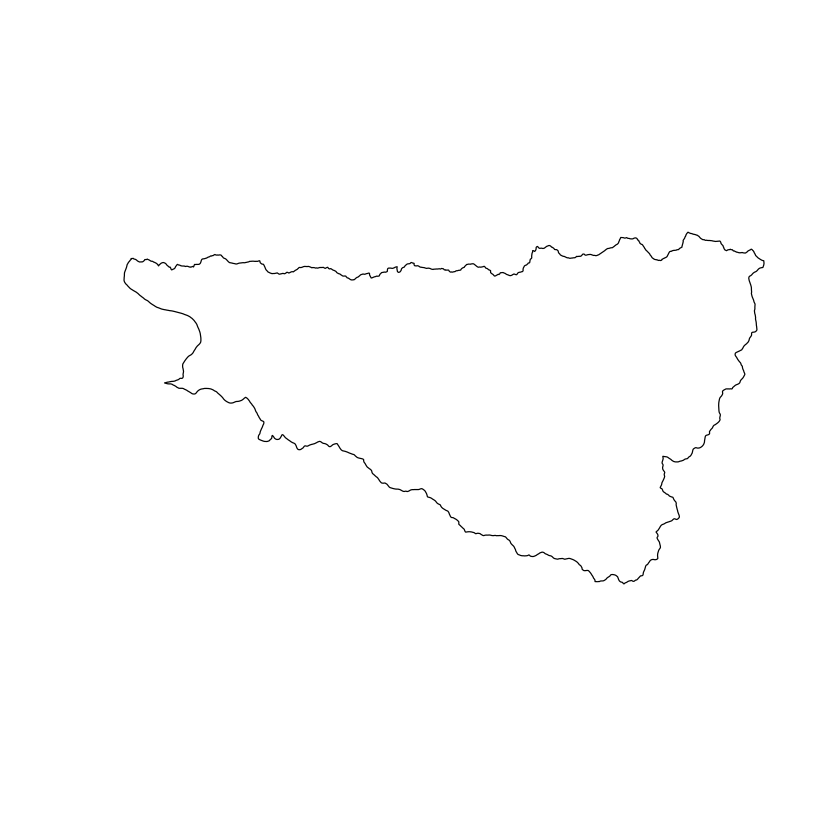

Deleting source `/content/HUC_Intersection_Set/huc_10_5.gpkg' failed
Writing layer `huc_10_5' to data source 
  `/content/HUC_Intersection_Set/huc_10_5.gpkg' using driver `GPKG'
Writing 98313 features with 40 fields and geometry type Point.
[1] "Finished HUC  Little North Santiam River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.1428 ymin: 44.68448 xmax: -122.5133 ymax: 44.83641
Geodetic CRS:  WGS 84
  OBJECTID                                  TNMID MetaSourceID SourceDataDesc
6      527 {2FFB86E8-7356-4DCA-B1F0-D27FF53234D1}         <NA>           <NA>
  SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
6             <NA>            <NA> 2013-01-18 08:56:26      NA  72785.23
  AreaSqKm States      HUC10                      Name HUType HUMod
6   294.55     OR 1709000506 Lower North Santiam River      S  <NA>
  Shape_Length Shape_Area                           geom
6     1.659515  0

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


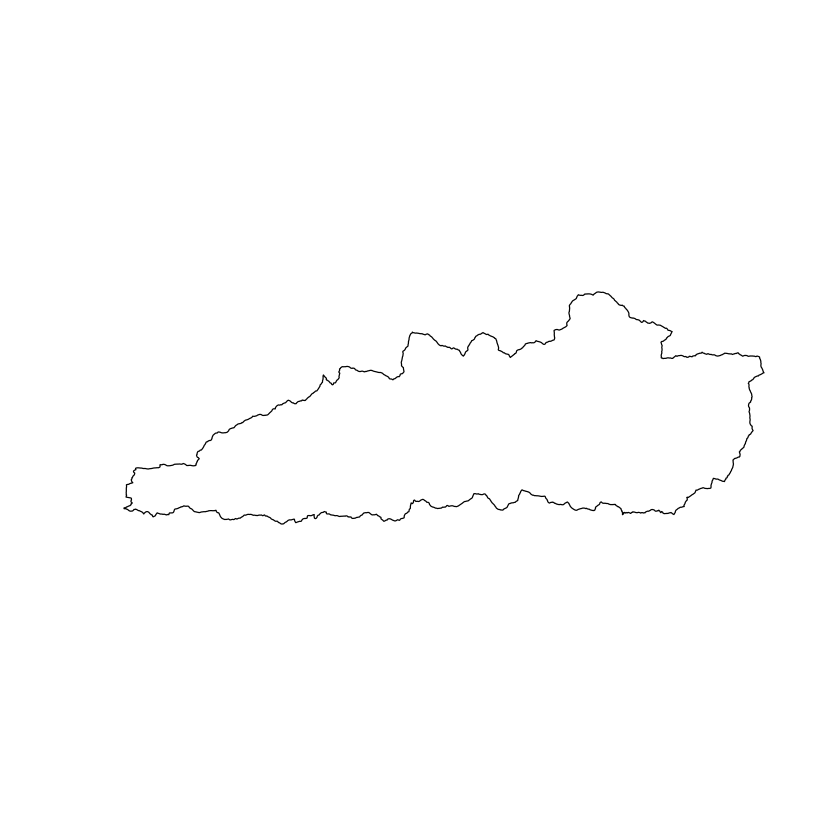

Deleting source `/content/HUC_Intersection_Set/huc_10_6.gpkg' failed
Writing layer `huc_10_6' to data source 
  `/content/HUC_Intersection_Set/huc_10_6.gpkg' using driver `GPKG'
Writing 96337 features with 40 fields and geometry type Point.
[1] "Finished HUC  Lower North Santiam River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.4035 ymin: 44.39851 xmax: -122.0278 ymax: 44.56968
Geodetic CRS:  WGS 84
  OBJECTID                                  TNMID MetaSourceID SourceDataDesc
7      528 {188F424A-A6EE-4724-8072-0DDDB4EF9827}         <NA>           <NA>
  SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
7             <NA>            <NA> 2013-01-18 08:56:26      NA  66755.73
  AreaSqKm States      HUC10                            Name HUType HUMod
7   270.15     OR 1709000601 Headwaters Middle Santiam River      S  <NA>
  Shape_Length Shape_Area                           geom
7     

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


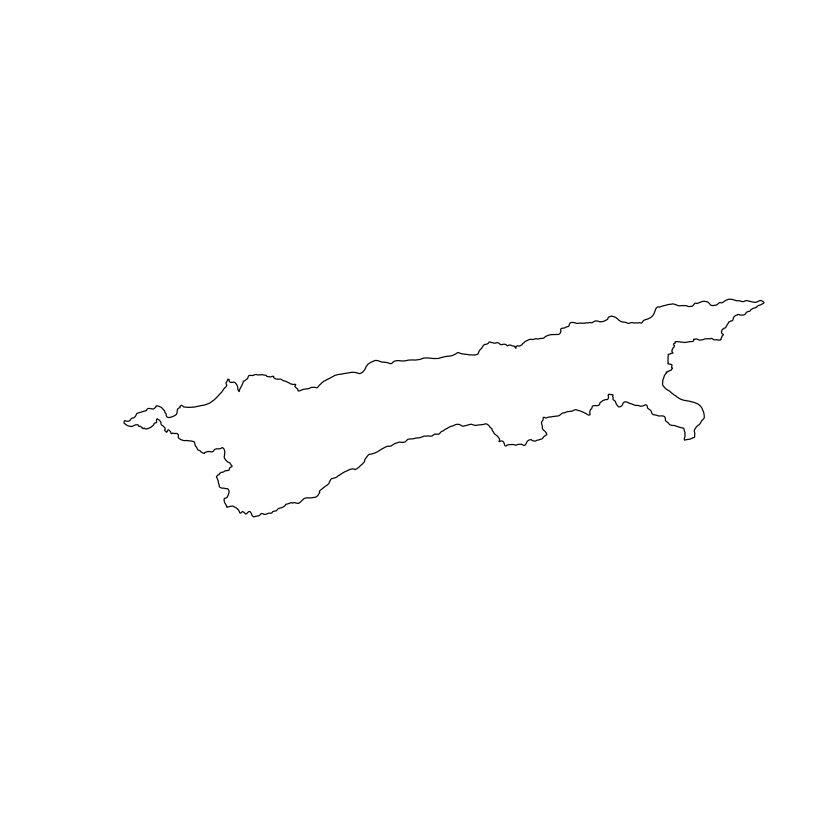

Deleting source `/content/HUC_Intersection_Set/huc_10_7.gpkg' failed
Writing layer `huc_10_7' to data source 
  `/content/HUC_Intersection_Set/huc_10_7.gpkg' using driver `GPKG'
Writing 117893 features with 40 fields and geometry type Point.
[1] "Finished HUC  Headwaters Middle Santiam River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.4618 ymin: 44.26719 xmax: -122.1244 ymax: 44.48744
Geodetic CRS:  WGS 84
  OBJECTID                                  TNMID MetaSourceID SourceDataDesc
8      529 {AFAA7DA6-A758-4368-B928-91C6B0C45D23}         <NA>           <NA>
  SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
8             <NA>            <NA> 2013-01-18 08:56:26      NA  101916.5
  AreaSqKm States      HUC10                Name HUType HUMod Shape_Length
8   412.44     OR 1709000602 South Santiam River      S  <NA>     1.144523
  Shape_Area                           geom
8 0.046574

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


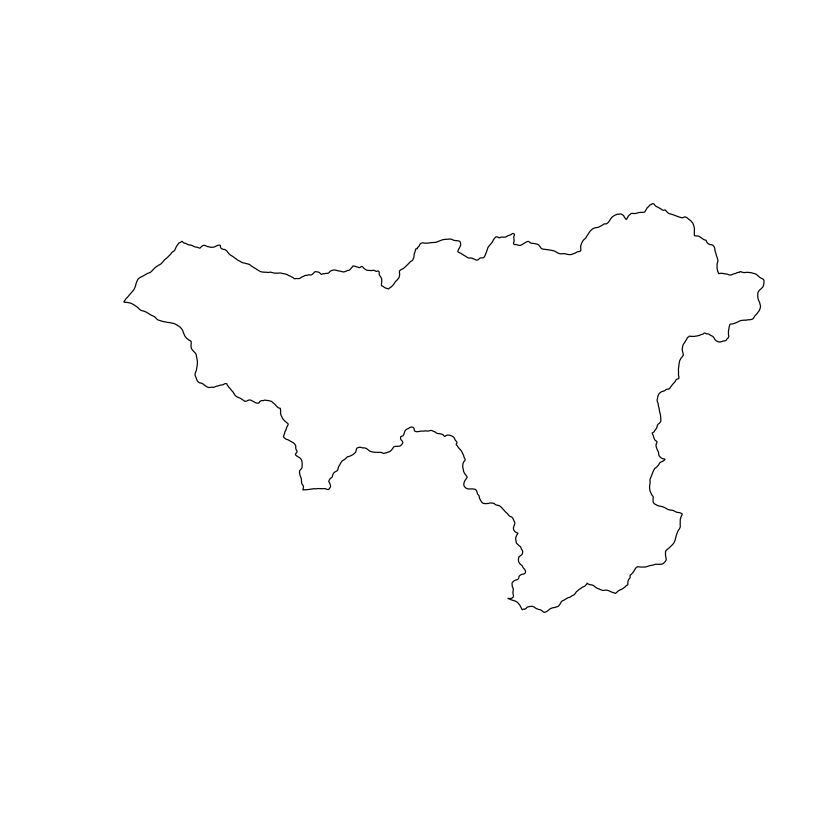

Deleting source `/content/HUC_Intersection_Set/huc_10_8.gpkg' failed
Writing layer `huc_10_8' to data source 
  `/content/HUC_Intersection_Set/huc_10_8.gpkg' using driver `GPKG'
Writing 206069 features with 40 fields and geometry type Point.
[1] "Finished HUC  South Santiam River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.5835 ymin: 44.42842 xmax: -122.1136 ymax: 44.66905
Geodetic CRS:  WGS 84
  OBJECTID                                  TNMID
9      530 {B4A41A24-3384-4AFF-88C8-E52C5D5230A5}
                            MetaSourceID SourceDataDesc SourceOriginator
9 {A4B99D2F-D7C5-4BCA-A07F-0B6FDF219B65}           <NA>             <NA>
  SourceFeatureID            LoadDate GNIS_ID AreaAcres AreaSqKm States
9            <NA> 2016-12-01 09:32:16      NA  109514.6   443.19     OR
       HUC10                                  Name HUType HUMod Shape_Length
9 1709000603 Green Peter Lake-Middle Santiam River 

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


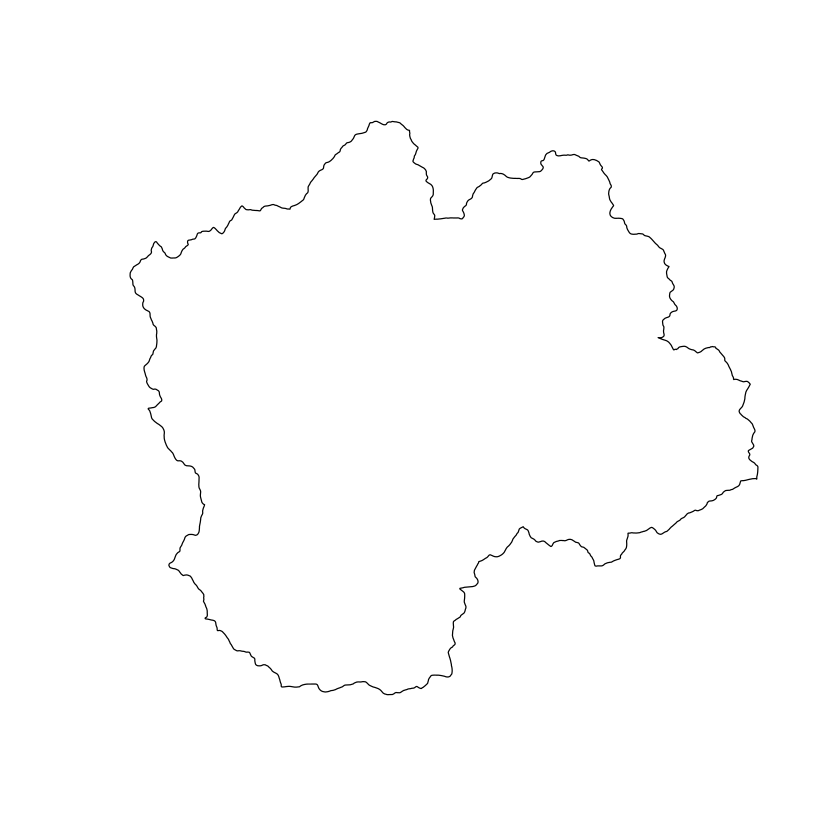

Deleting source `/content/HUC_Intersection_Set/huc_10_9.gpkg' failed
Writing layer `huc_10_9' to data source 
  `/content/HUC_Intersection_Set/huc_10_9.gpkg' using driver `GPKG'
Writing 172908 features with 40 fields and geometry type Point.
[1] "Finished HUC  Green Peter Lake-Middle Santiam River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.6753 ymin: 44.31788 xmax: -122.4218 ymax: 44.48299
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID
10      531 {23A6550A-4B13-425E-89DD-4EF5DDA61958}
                             MetaSourceID SourceDataDesc SourceOriginator
10 {A4B99D2F-D7C5-4BCA-A07F-0B6FDF219B65}           <NA>             <NA>
   SourceFeatureID            LoadDate GNIS_ID AreaAcres AreaSqKm States
10            <NA> 2016-12-01 09:32:16      NA  36552.14   147.92     OR
        HUC10                            Name HUType HUMod Shape_Length
10 1709000604 Foster Lake-South 

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


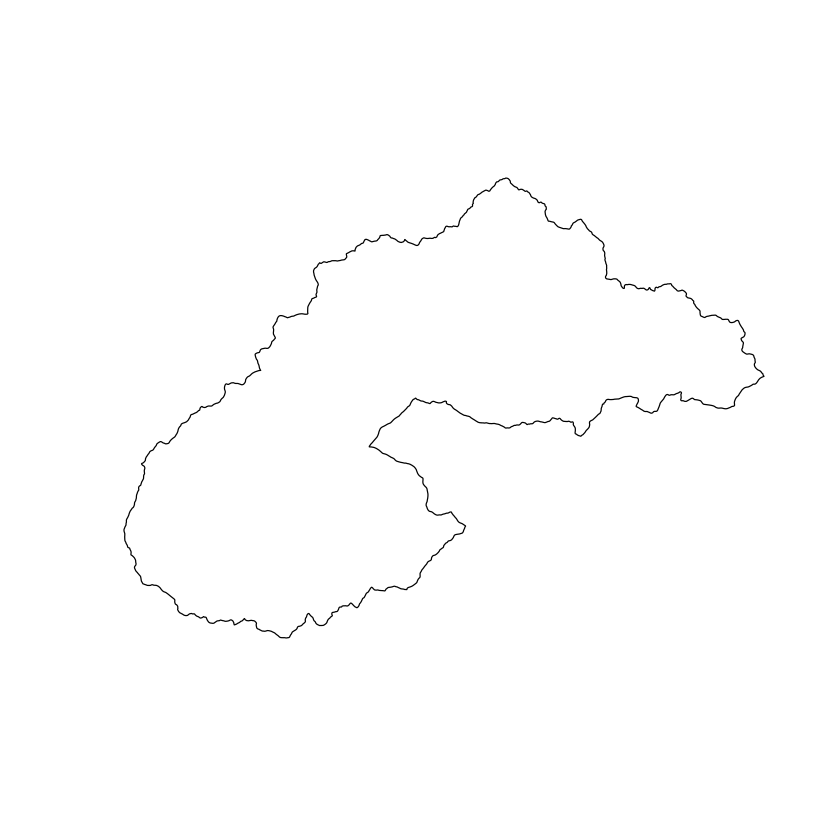

Deleting source `/content/HUC_Intersection_Set/huc_10_10.gpkg' failed
Writing layer `huc_10_10' to data source 
  `/content/HUC_Intersection_Set/huc_10_10.gpkg' using driver `GPKG'
Writing 73478 features with 40 fields and geometry type Point.
[1] "Finished HUC  Foster Lake-South Santiam River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.6788 ymin: 44.26713 xmax: -122.4149 ymax: 44.41392
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID MetaSourceID SourceDataDesc
11      532 {E84D9757-D225-4662-A345-23BB35F2EAD8}         <NA>           <NA>
   SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
11             <NA>            <NA> 2013-01-18 08:56:26      NA  40697.24
   AreaSqKm States      HUC10        Name HUType HUMod Shape_Length Shape_Area
11    164.7     OR 1709000605 Wiley Creek      S  <NA>    0.7647108 0.01858415
                             geom
11 MUL

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


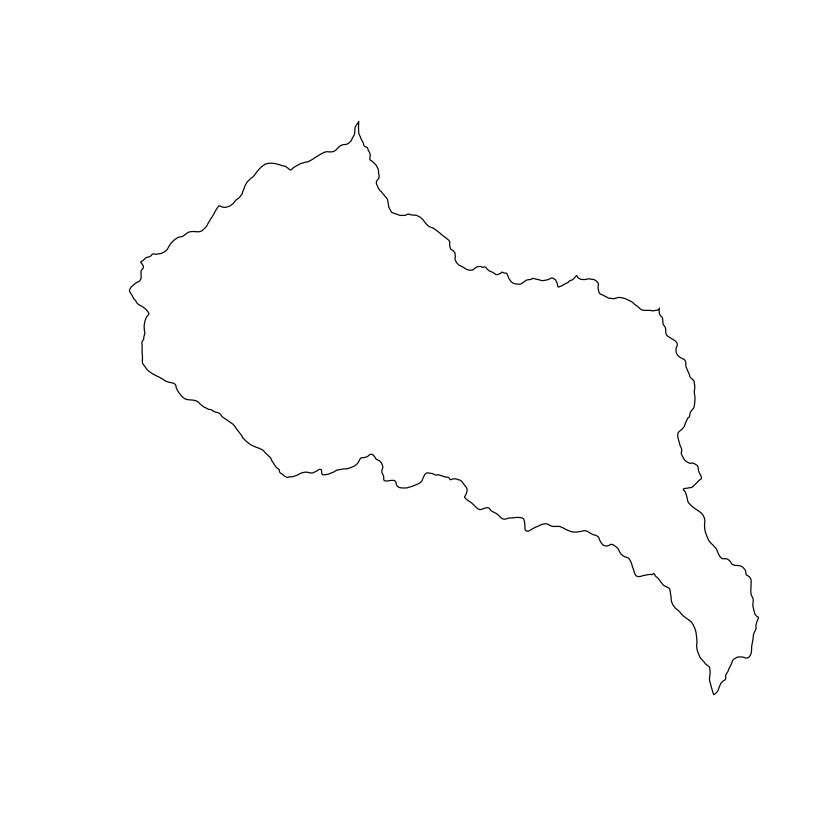

Deleting source `/content/HUC_Intersection_Set/huc_10_11.gpkg' failed
Writing layer `huc_10_11' to data source 
  `/content/HUC_Intersection_Set/huc_10_11.gpkg' using driver `GPKG'
Writing 85232 features with 40 fields and geometry type Point.
[1] "Finished HUC  Wiley Creek"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.9466 ymin: 44.49638 xmax: -122.4399 ymax: 44.70031
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID MetaSourceID SourceDataDesc
12      533 {D38372A1-B3E7-4F92-9846-FA1FA4BBC151}         <NA>           <NA>
   SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
12             <NA>            <NA> 2013-01-18 08:56:26      NA  99729.22
   AreaSqKm States      HUC10           Name HUType HUMod Shape_Length
12   403.59     OR 1709000606 Crabtree Creek      S  <NA>     1.377602
   Shape_Area                           geom
12 0.04575148 MULTIPOLYGON (((-

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


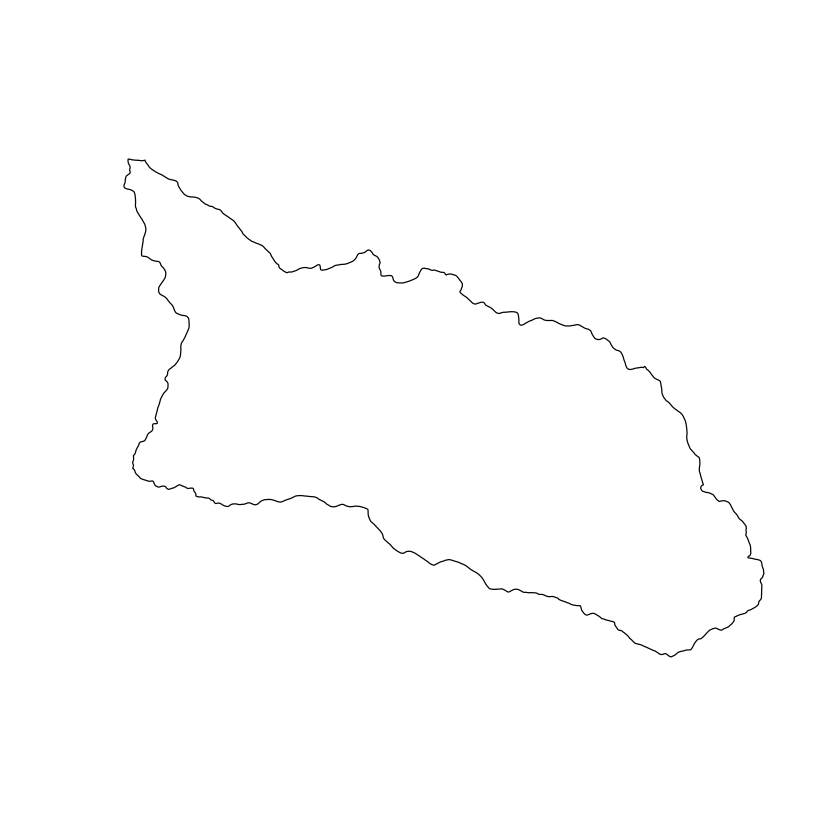

Deleting source `/content/HUC_Intersection_Set/huc_10_12.gpkg' failed
Writing layer `huc_10_12' to data source 
  `/content/HUC_Intersection_Set/huc_10_12.gpkg' using driver `GPKG'
Writing 166553 features with 40 fields and geometry type Point.
[1] "Finished HUC  Crabtree Creek"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.9727 ymin: 44.62439 xmax: -122.3099 ymax: 44.77002
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID MetaSourceID SourceDataDesc
13      534 {C54023EE-80B2-46DC-858D-288D8D84D481}         <NA>           <NA>
   SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
13             <NA>            <NA> 2013-01-18 08:56:26      NA  92985.22
   AreaSqKm States      HUC10         Name HUType HUMod Shape_Length Shape_Area
13    376.3     OR 1709000607 Thomas Creek      S  <NA>     1.612097 0.04271937
                             geom
13 MULTIPOLYGON (((-

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


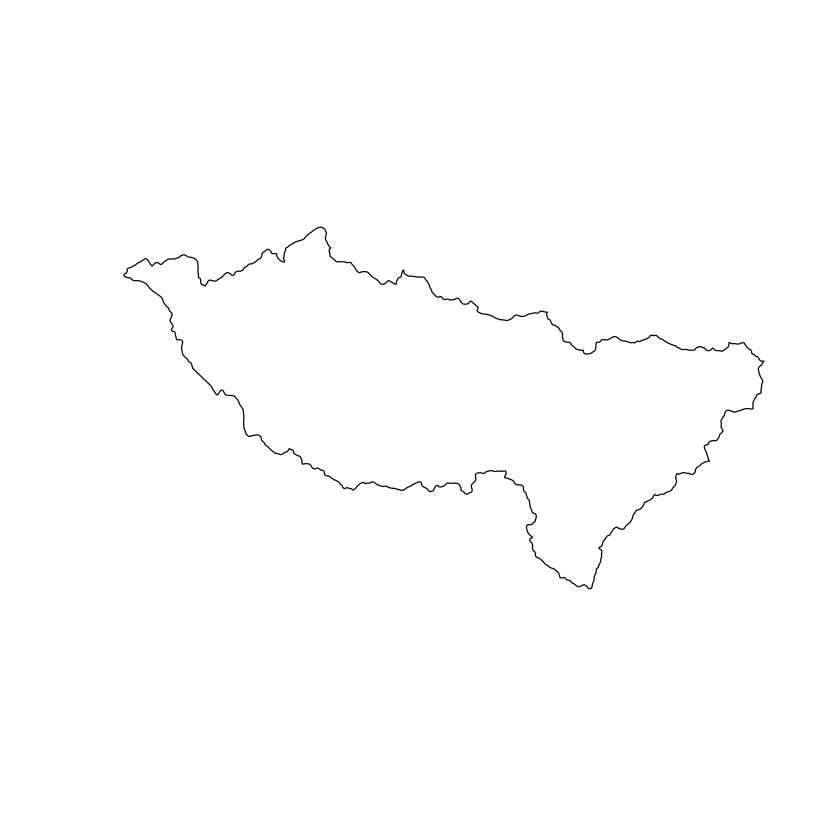

Deleting source `/content/HUC_Intersection_Set/huc_10_13.gpkg' failed
Writing layer `huc_10_13' to data source 
  `/content/HUC_Intersection_Set/huc_10_13.gpkg' using driver `GPKG'
Writing 133942 features with 40 fields and geometry type Point.
[1] "Finished HUC  Thomas Creek"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.0159 ymin: 44.32229 xmax: -122.5774 ymax: 44.71794
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID MetaSourceID SourceDataDesc
14      535 {52AB359C-B1A4-42B4-B65F-2F08ABC34C5F}         <NA>           <NA>
   SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
14             <NA>            <NA> 2013-01-18 08:56:26      NA  118088.8
   AreaSqKm States      HUC10                               Name HUType HUMod
14   477.89     OR 1709000608 Hamilton Creek-South Santiam River      S  <NA>
   Shape_Length Shape_Area                           geom
14

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


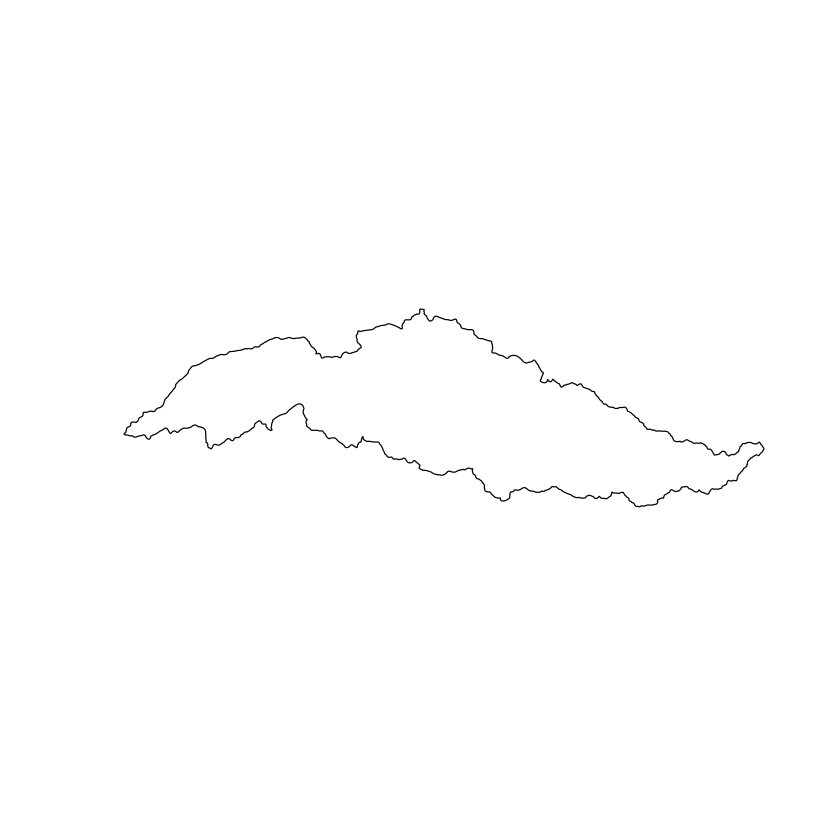

Deleting source `/content/HUC_Intersection_Set/huc_10_14.gpkg' failed
Writing layer `huc_10_14' to data source 
  `/content/HUC_Intersection_Set/huc_10_14.gpkg' using driver `GPKG'
Writing 215711 features with 40 fields and geometry type Point.
[1] "Finished HUC  Hamilton Creek-South Santiam River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.2121 ymin: 43.96432 xmax: -121.768 ymax: 44.17518
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID MetaSourceID SourceDataDesc
15      592 {C83322E4-0815-4533-AF2C-865C6299D7B1}         <NA>           <NA>
   SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
15             <NA>            <NA> 2013-01-18 08:56:26      NA  101901.7
   AreaSqKm States      HUC10        Name HUType HUMod Shape_Length Shape_Area
15   412.38     OR 1709000401 Horse Creek      M  <NA>     1.285009 0.04633182
                             geom
15 

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


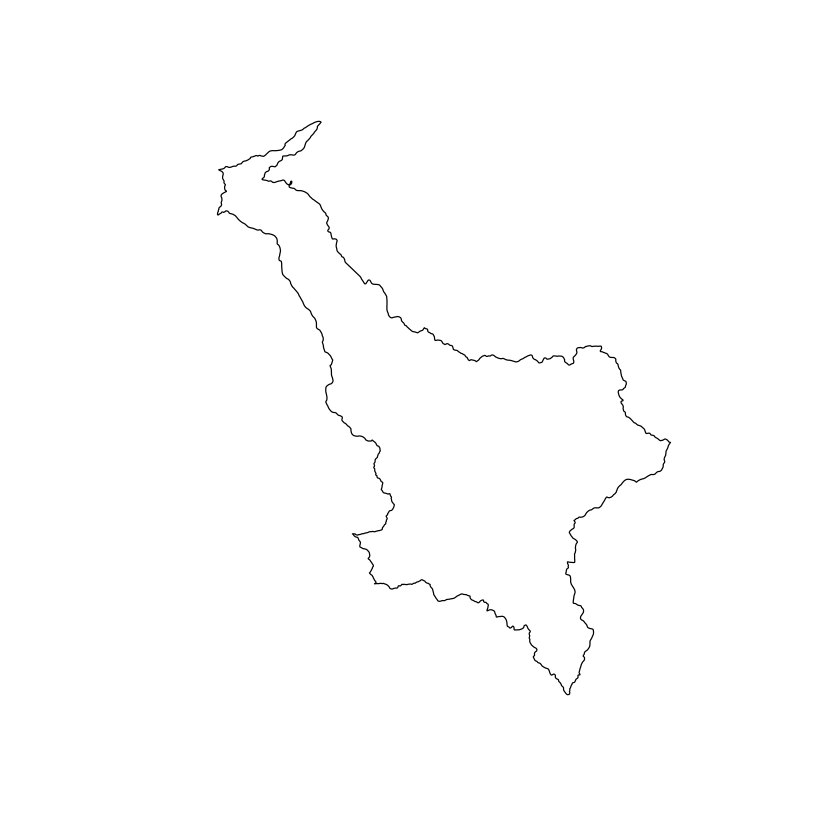

Deleting source `/content/HUC_Intersection_Set/huc_10_15.gpkg' failed
Writing layer `huc_10_15' to data source 
  `/content/HUC_Intersection_Set/huc_10_15.gpkg' using driver `GPKG'
Writing 221438 features with 40 fields and geometry type Point.
[1] "Finished HUC  Horse Creek"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.2071 ymin: 44.1143 xmax: -121.7705 ymax: 44.50841
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID MetaSourceID SourceDataDesc
16      593 {8C6919C6-3351-45A5-B5C9-0ADF80DB10FC}         <NA>           <NA>
   SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
16             <NA>            <NA> 2013-01-18 08:56:26      NA    230729
   AreaSqKm States      HUC10                      Name HUType HUMod
16   933.73     OR 1709000402 Headwaters McKenzie River      S  <NA>
   Shape_Length Shape_Area                           geom
16     1.864254  0.105

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


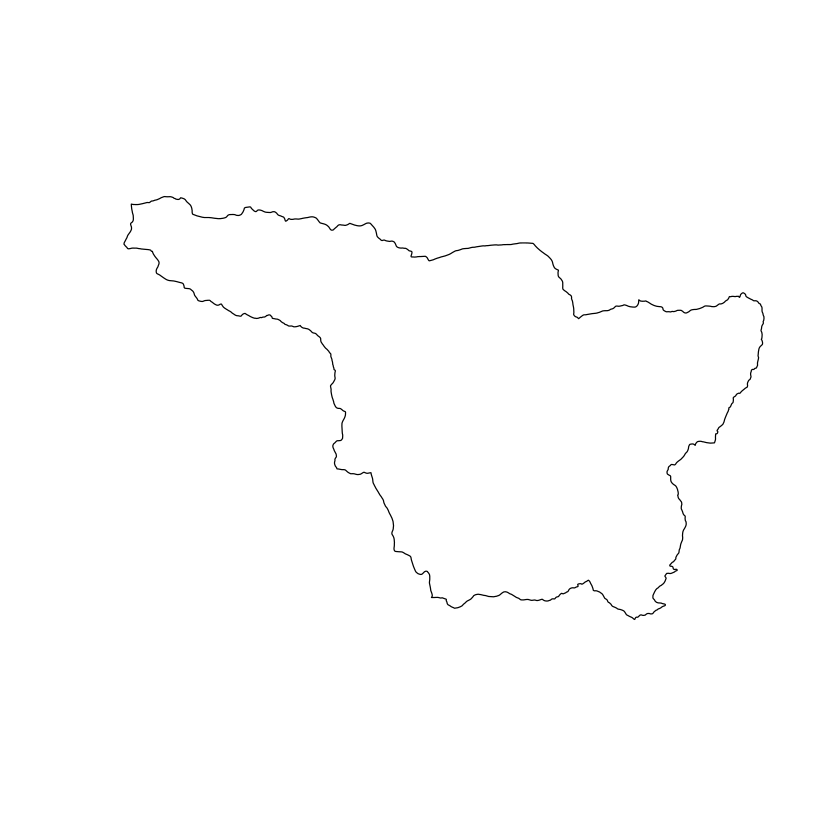

Deleting source `/content/HUC_Intersection_Set/huc_10_16.gpkg' failed
Writing layer `huc_10_16' to data source 
  `/content/HUC_Intersection_Set/huc_10_16.gpkg' using driver `GPKG'
Writing 453951 features with 40 fields and geometry type Point.
[1] "Finished HUC  Headwaters McKenzie River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.2933 ymin: 43.85856 xmax: -121.8577 ymax: 44.1619
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID MetaSourceID SourceDataDesc
17      594 {CBBB1DBD-628B-4875-B6D4-124D9B862038}         <NA>           <NA>
   SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
17             <NA>            <NA> 2013-01-18 08:56:26      NA  137670.1
   AreaSqKm States      HUC10                      Name HUType HUMod
17   557.13     OR 1709000403 South Fork McKenzie River      S  <NA>
   Shape_Length Shape_Area                           geom
17     1

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


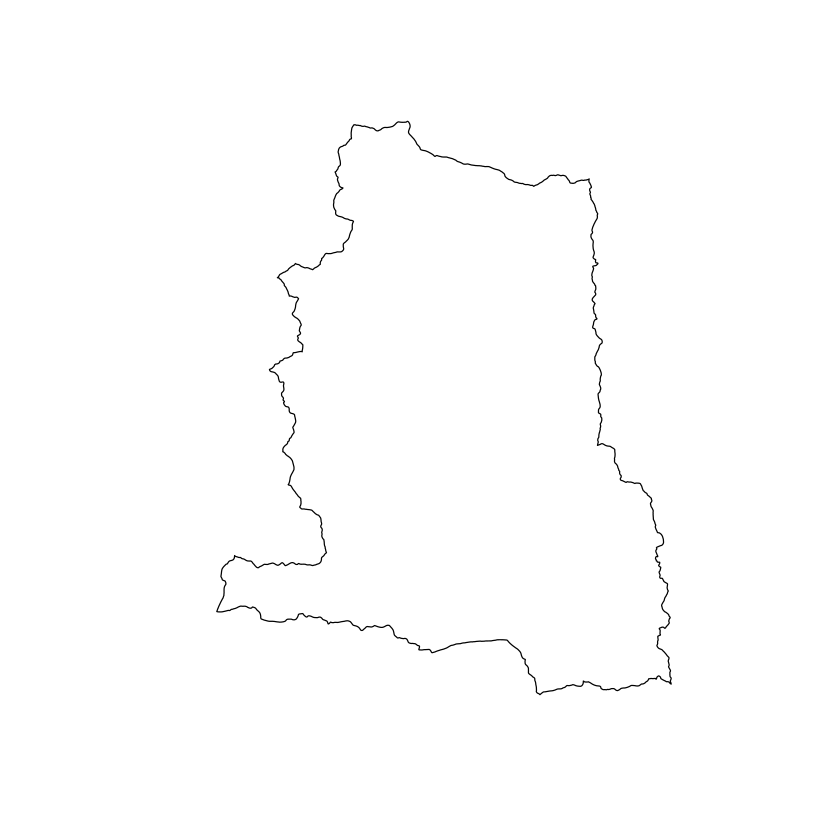

Deleting source `/content/HUC_Intersection_Set/huc_10_17.gpkg' failed
Writing layer `huc_10_17' to data source 
  `/content/HUC_Intersection_Set/huc_10_17.gpkg' using driver `GPKG'
Writing 279057 features with 40 fields and geometry type Point.
[1] "Finished HUC  South Fork McKenzie River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.3832 ymin: 44.15328 xmax: -122.1017 ymax: 44.33805
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID MetaSourceID SourceDataDesc
18      595 {AD1A0D38-7E8A-406B-A797-80C32CDB363B}         <NA>           <NA>
   SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
18             <NA>            <NA> 2013-01-18 08:56:26      NA  58954.58
   AreaSqKm States      HUC10       Name HUType HUMod Shape_Length Shape_Area
18   238.58     OR 1709000404 Blue River      S  <NA>    0.9069749 0.02688158
                             geom
18 MULTIPOLYG

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


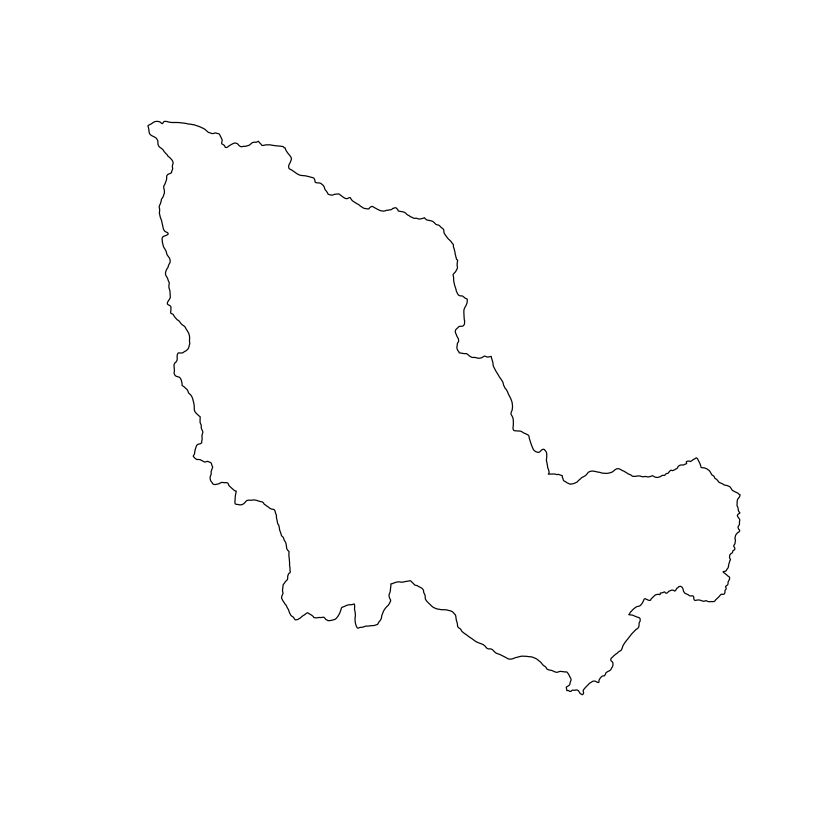

Deleting source `/content/HUC_Intersection_Set/huc_10_18.gpkg' failed
Writing layer `huc_10_18' to data source 
  `/content/HUC_Intersection_Set/huc_10_18.gpkg' using driver `GPKG'
Writing 129685 features with 40 fields and geometry type Point.
[1] "Finished HUC  Blue River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.4273 ymin: 43.96912 xmax: -122.1899 ymax: 44.21152
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID MetaSourceID SourceDataDesc
19      596 {30746DBB-FD7C-4CA5-979C-A9BB30D4D61C}         <NA>           <NA>
   SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
19             <NA>            <NA> 2013-01-18 08:56:26      NA  47786.06
   AreaSqKm States      HUC10                        Name HUType HUMod
19   193.38     OR 1709000405 Quartz Creek-McKenzie River      S  <NA>
   Shape_Length Shape_Area                           geom
19     1.125354 0.

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


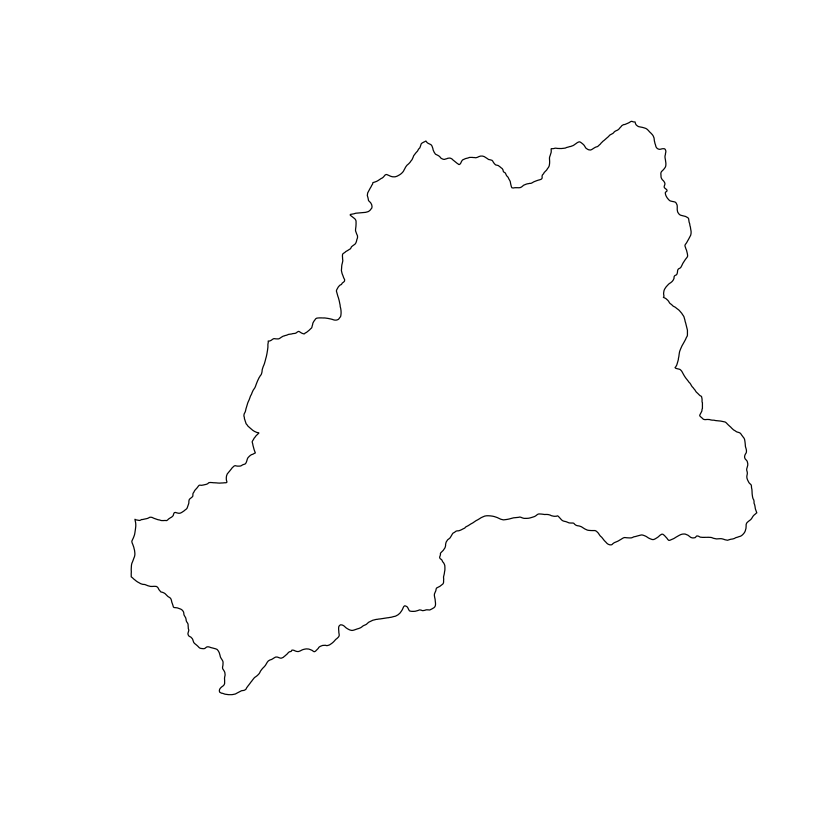

Deleting source `/content/HUC_Intersection_Set/huc_10_19.gpkg' failed
Writing layer `huc_10_19' to data source 
  `/content/HUC_Intersection_Set/huc_10_19.gpkg' using driver `GPKG'
Writing 97113 features with 40 fields and geometry type Point.
[1] "Finished HUC  Quartz Creek-McKenzie River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.1059 ymin: 44.01958 xmax: -122.3483 ymax: 44.23558
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID MetaSourceID SourceDataDesc
20      597 {F2E1DE1F-E6AD-45E4-B52D-0F5293C2C834}         <NA>           <NA>
   SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
20             <NA>            <NA> 2013-01-18 08:56:26      NA  165320.9
   AreaSqKm States      HUC10           Name HUType HUMod Shape_Length
20   669.03     OR 1709000407 McKenzie River      S  <NA>     2.057678
   Shape_Area                           geom
20 0.07521543 M

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


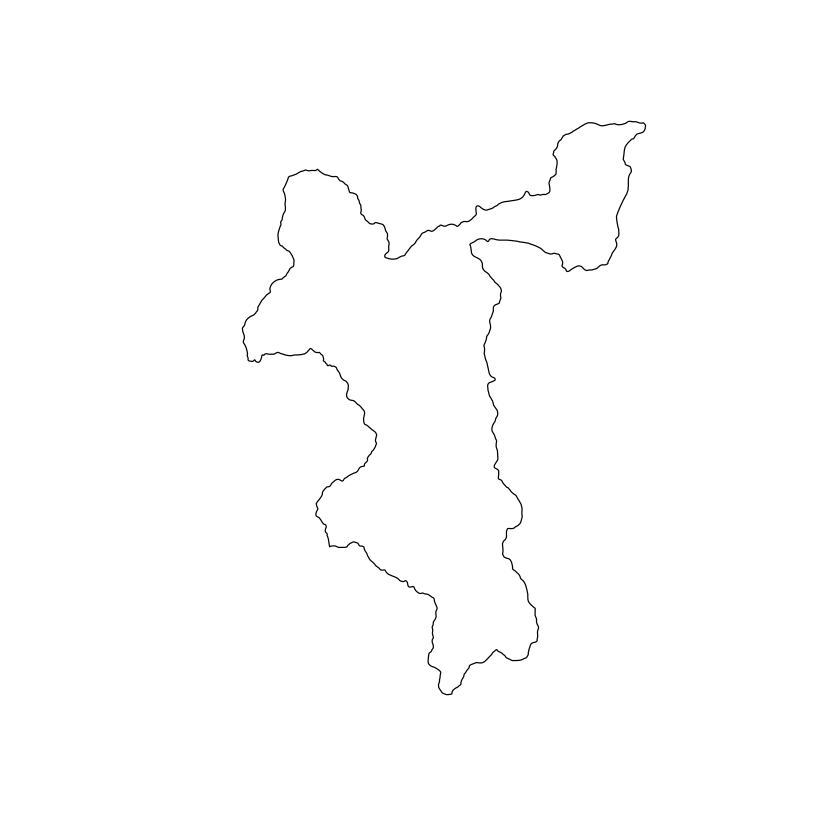

Deleting source `/content/HUC_Intersection_Set/huc_10_20.gpkg' failed
Writing layer `huc_10_20' to data source 
  `/content/HUC_Intersection_Set/huc_10_20.gpkg' using driver `GPKG'
Writing 286439 features with 40 fields and geometry type Point.
[1] "Finished HUC  McKenzie River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.0079 ymin: 44.07915 xmax: -122.5752 ymax: 44.30088
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID
21      598 {D4FEC1E4-27FA-42BE-A6EB-AB87357E83E2}
                             MetaSourceID SourceDataDesc SourceOriginator
21 {3FC953DC-51FF-4FE8-8A83-0725D7A39ACD}           <NA>             <NA>
   SourceFeatureID            LoadDate GNIS_ID AreaAcres AreaSqKm States
21            <NA> 2020-03-09 18:33:39      NA  114672.4   464.06     OR
        HUC10         Name HUType HUMod Shape_Length Shape_Area
21 1709000406 Mohawk River      S  <NA>     1.241901 0.05224

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


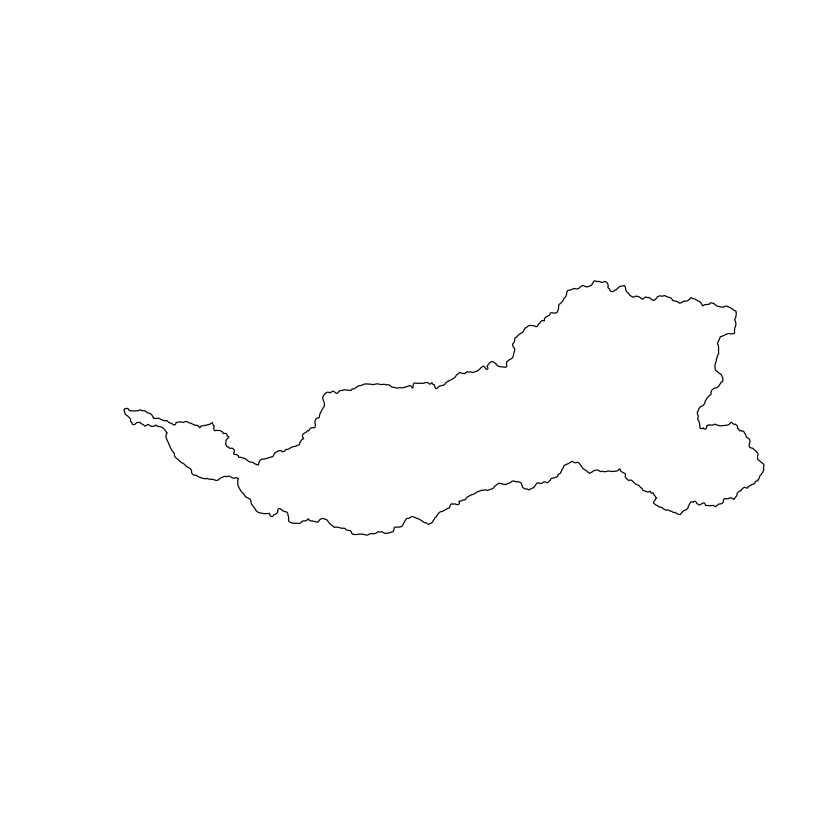

Deleting source `/content/HUC_Intersection_Set/huc_10_21.gpkg' failed
Writing layer `huc_10_21' to data source 
  `/content/HUC_Intersection_Set/huc_10_21.gpkg' using driver `GPKG'
Writing 198076 features with 40 fields and geometry type Point.
[1] "Finished HUC  Mohawk River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.1813 ymin: 44.43241 xmax: -122.8447 ymax: 44.63977
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID MetaSourceID SourceDataDesc
22      697 {2A769466-46F5-44A7-BA9B-9C55892A3321}         <NA>           <NA>
   SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
22             <NA>            <NA> 2013-01-18 08:56:26      NA  54837.73
   AreaSqKm States      HUC10                  Name HUType HUMod Shape_Length
22   221.92     OR 1709000304 Lower Calapooia River      S  <NA>     1.128174
   Shape_Area                           geom
22 0.02512725 M

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


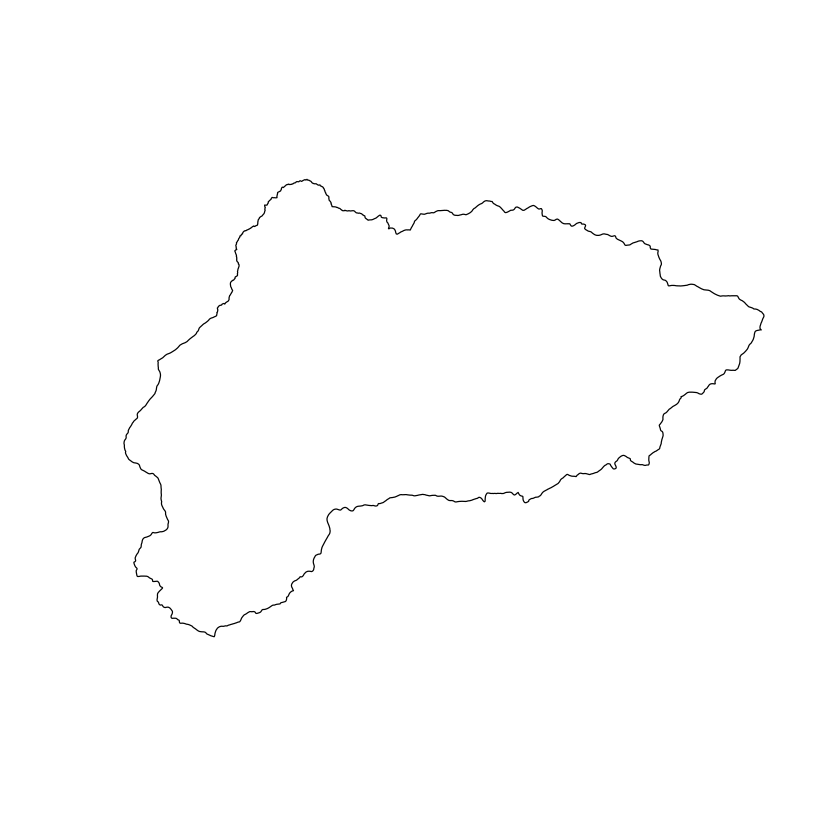

Deleting source `/content/HUC_Intersection_Set/huc_10_22.gpkg' failed
Writing layer `huc_10_22' to data source 
  `/content/HUC_Intersection_Set/huc_10_22.gpkg' using driver `GPKG'
Writing 102842 features with 40 fields and geometry type Point.
[1] "Finished HUC  Lower Calapooia River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.558 ymin: 43.86403 xmax: -123.0578 ymax: 44.41449
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID
23      698 {C9A11F6A-6DD0-4FE2-A637-2F2C3D89227E}
                             MetaSourceID SourceDataDesc SourceOriginator
23 {3E502A6E-6F5A-4363-A39D-E412DBA45A78}           <NA>             <NA>
   SourceFeatureID            LoadDate GNIS_ID AreaAcres AreaSqKm States
23            <NA> 2019-02-17 19:18:15      NA  263593.2  1066.72     OR
        HUC10           Name HUType HUMod Shape_Length Shape_Area
23 1709000301 Long Tom River      S  <NA>     2.1994

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


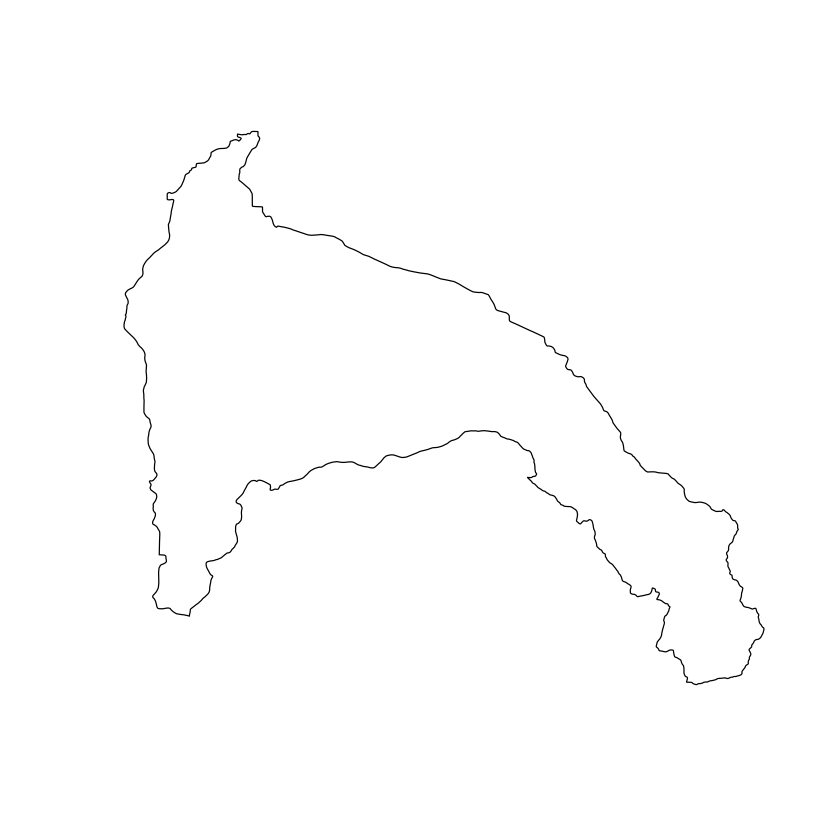

Deleting source `/content/HUC_Intersection_Set/huc_10_23.gpkg' failed
Writing layer `huc_10_23' to data source 
  `/content/HUC_Intersection_Set/huc_10_23.gpkg' using driver `GPKG'
Writing 365606 features with 40 fields and geometry type Point.
[1] "Finished HUC  Long Tom River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 44.27509 xmax: -123.2532 ymax: 44.73769
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID
24      699 {8034B764-820C-4EE8-A1FA-A3A0E8B0EDBA}
                             MetaSourceID SourceDataDesc SourceOriginator
24 {3E502A6E-6F5A-4363-A39D-E412DBA45A78}           <NA>             <NA>
   SourceFeatureID            LoadDate GNIS_ID AreaAcres AreaSqKm States
24            <NA> 2019-02-17 19:18:15      NA  193858.9   784.52     OR
        HUC10        Name HUType HUMod Shape_Length Shape_Area
24 1709000302 Marys River      S  <NA>     1.911897 0.0887787

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


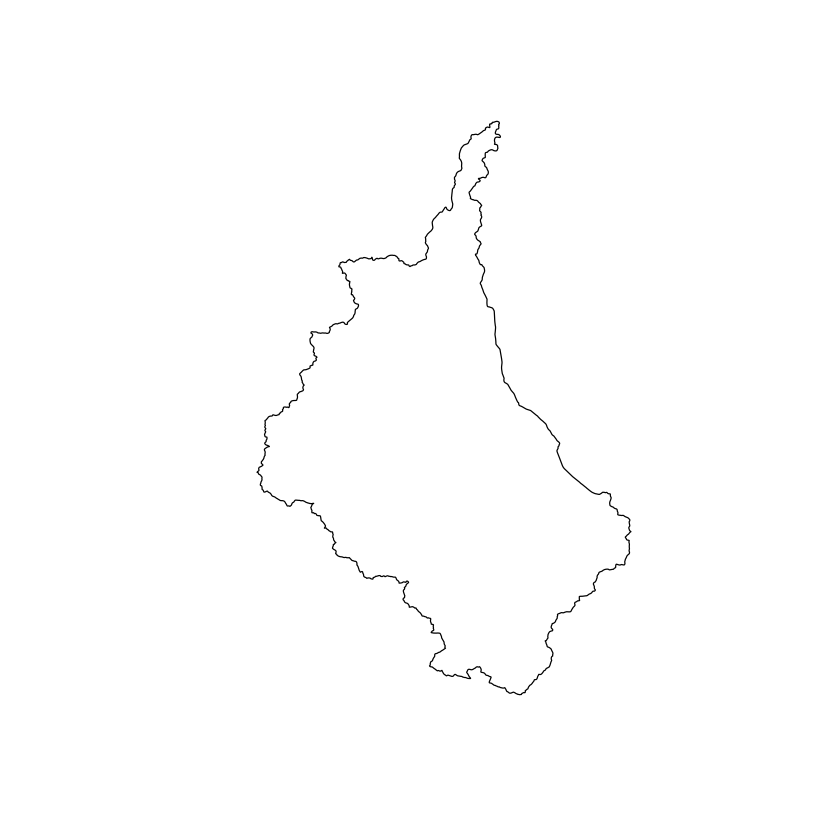

Deleting source `/content/HUC_Intersection_Set/huc_10_24.gpkg' failed
Writing layer `huc_10_24' to data source 
  `/content/HUC_Intersection_Set/huc_10_24.gpkg' using driver `GPKG'
Writing 280432 features with 40 fields and geometry type Point.
[1] "Finished HUC  Marys River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6539 ymin: 44.6216 xmax: -123.1294 ymax: 44.90893
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID
25      700 {8E6905DC-3696-4795-AF8A-8248B84CBE35}
                             MetaSourceID SourceDataDesc SourceOriginator
25 {3E502A6E-6F5A-4363-A39D-E412DBA45A78}           <NA>             <NA>
   SourceFeatureID            LoadDate GNIS_ID AreaAcres AreaSqKm States
25            <NA> 2019-02-17 19:18:15      NA  201800.2   816.66     OR
        HUC10             Name HUType HUMod Shape_Length Shape_Area
25 1709000305 Luckiamute River      S  <NA>      1.81217  0.

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


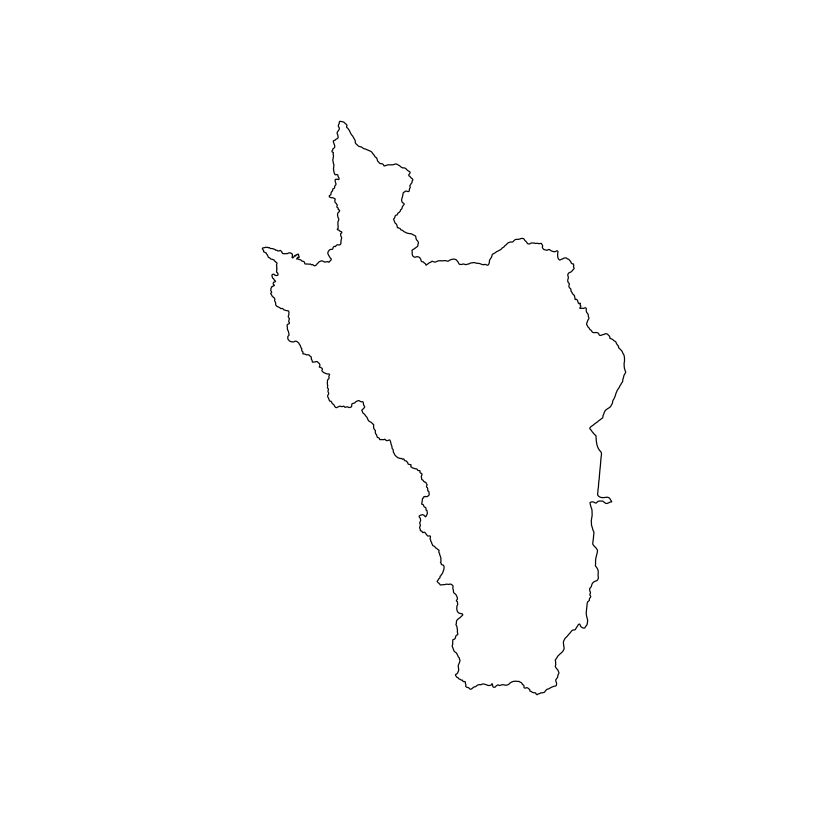

Deleting source `/content/HUC_Intersection_Set/huc_10_25.gpkg' failed
Writing layer `huc_10_25' to data source 
  `/content/HUC_Intersection_Set/huc_10_25.gpkg' using driver `GPKG'
Writing 351107 features with 40 fields and geometry type Point.
[1] "Finished HUC  Luckiamute River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.1469 ymin: 44.20937 xmax: -122.3215 ymax: 44.5276
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID
26      701 {6A02F507-A232-489E-A44C-362860EF236E}
                             MetaSourceID SourceDataDesc SourceOriginator
26 {3FC953DC-51FF-4FE8-8A83-0725D7A39ACD}           <NA>             <NA>
   SourceFeatureID            LoadDate GNIS_ID AreaAcres AreaSqKm States
26            <NA> 2020-03-09 18:33:39      NA  183573.7    742.9     OR
        HUC10                  Name HUType HUMod Shape_Length Shape_Area
26 1709000303 Upper Calapooia River      S  <NA>  

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


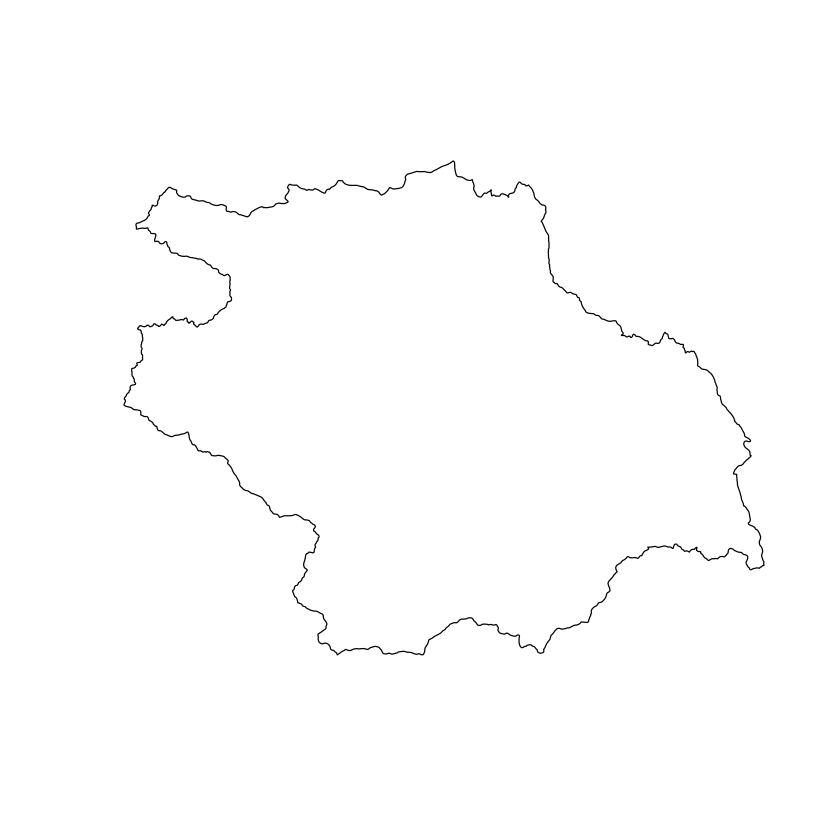

Deleting source `/content/HUC_Intersection_Set/huc_10_26.gpkg' failed
Writing layer `huc_10_26' to data source 
  `/content/HUC_Intersection_Set/huc_10_26.gpkg' using driver `GPKG'
Writing 344865 features with 40 fields and geometry type Point.
[1] "Finished HUC  Upper Calapooia River"
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.3188 ymin: 44.01926 xmax: -122.895 ymax: 44.75587
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID
27      702 {B2FCCD80-3916-4C40-86EE-49FE4F353819}
                             MetaSourceID SourceDataDesc SourceOriginator
27 {3FC953DC-51FF-4FE8-8A83-0725D7A39ACD}           <NA>             <NA>
   SourceFeatureID            LoadDate GNIS_ID AreaAcres AreaSqKm States
27            <NA> 2020-03-09 18:33:39      NA  300670.2  1216.77     OR
        HUC10                         Name HUType HUMod Shape_Length Shape_Area
27 1709000306 Muddy Creek-Willamette R

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


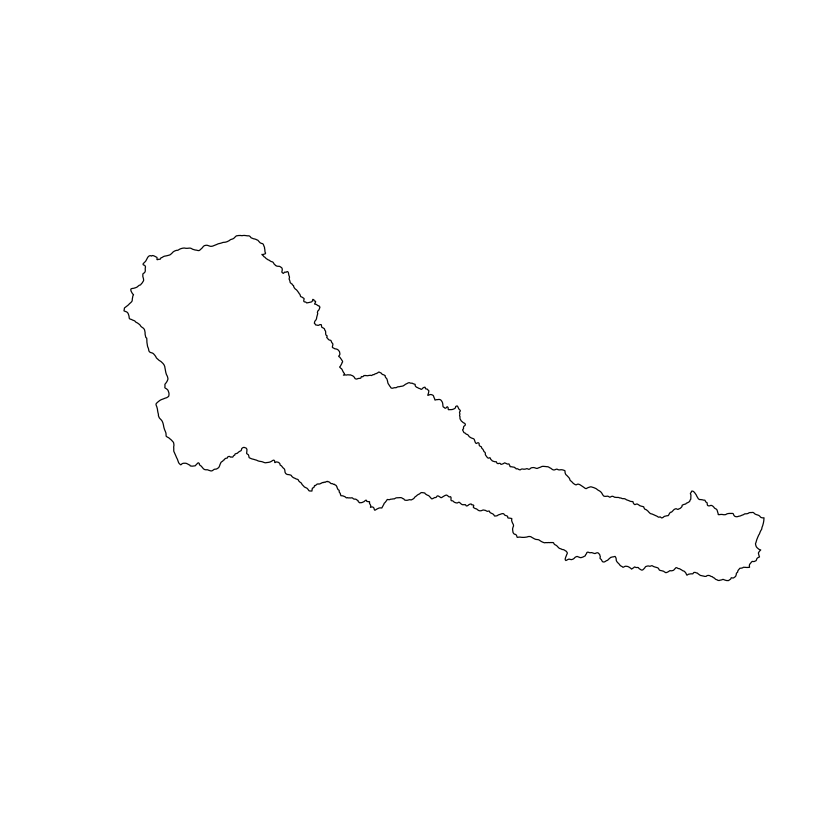

Deleting source `/content/HUC_Intersection_Set/huc_10_27.gpkg' failed
Writing layer `huc_10_27' to data source 
  `/content/HUC_Intersection_Set/huc_10_27.gpkg' using driver `GPKG'
Writing 480731 features with 40 fields and geometry type Point.
[1] "Finished HUC  Muddy Creek-Willamette River"


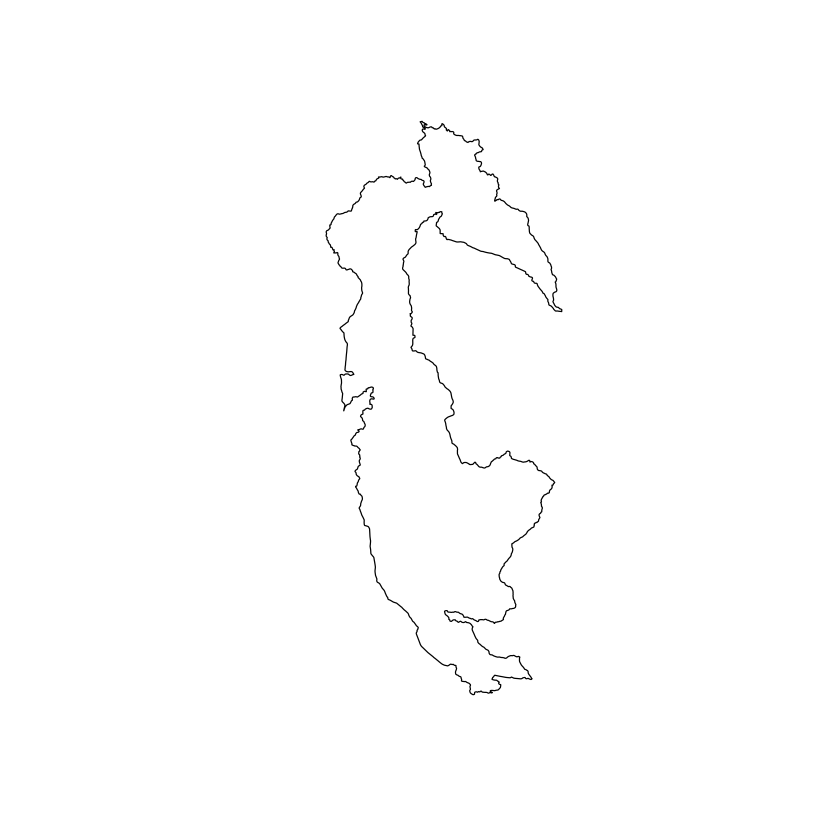

In [68]:
# Extracting and plotting the geometry of a given huc index
huc_index <- 1

for(huc_index in 1:nrow(huc_10_gpgk)){
plot(huc_10_gpgk[huc_index,]$geom)
print(huc_10_gpgk[huc_index,])
query_wkt <- st_as_text(huc_10_gpgk[huc_index,]$geom, crs = 4326, EWKT = TRUE)


# Formulate the SQL query to get intersecting geometries
query_sql <- paste0("SELECT * FROM hja_gedi WHERE ST_Intersects(geom,'", query_wkt, "')")

# Connect to the PostgreSQL database
conn <- RPostgreSQL::dbConnect("PostgreSQL",
                               dbname = "jifesypi",
                               host = "mild-williams-pear.db.elephantsql.com",
                               user = "jifesypi",
                               password = "Qxds23zjkpIIU343-GGHNlxqFdD3Pdlr")

# Read data from the database into a spatial dataframe
gedi_sf <- st_read(conn, query = query_sql)
dbDisconnect(conn)

# Convert the spatial dataframe into a datatable
gedi_dt <- gedi_sf %>% data.table

# Add a buffer to the geometry
gedi_dt[, geom_buffer := geom %>% st_transform('EPSG:6822') %>% st_buffer(12.5)]
summary_dt <- gedi_dt

summary_dt$gedi_year <- delta_time_to_timestamp(summary_dt$delta_time) %>% format("%Y")

# Extract raster values for multiple datasets and add them to the datatable
datasets <- list(landtrendr = landtrendr_tif, hja_2008 = hja_2008_tif, conus_2003 = conus_2003_tif, conus_2016 = conus_2016_tif)
for(name in names(datasets)) {
  rast <- terra::rast(datasets[[name]])
  extract_values <- gedi_dt[, geom_buffer] %>% st_as_sf %>%
    exact_extract(rast, ., force_df = T, c('min','max','mean','median'))
  col_names <- paste(c('min','max','mean','median'), name, sep = '_')
  head(extract_values)
  names(extract_values) <- col_names
  summary_dt <- data.table(summary_dt, extract_values[, col_names])
}

# Filter out negative values from agbd column
summary_dt$agbd[summary_dt$agbd < 0] <- NA

# Convert delta time to a readable timestamp
delta_time_to_timestamp <- function(delta_time) {
  reference_date <- as.POSIXct("2018-01-01 00:00:00", tz = "UTC")
  timestamp <- reference_date + delta_time
  return(timestamp)
}

summary_dt[, gedi_vec_id := gedi_vec_gpkg[['gedi_vec_id']][st_intersects(summary_dt$geom, gedi_vec_gpkg) %>% lapply(function(x) {x[1]}) %>% unlist]]
summary_dt[, gedi_vec_year := gedi_vec_gpkg[['DN']][st_intersects(summary_dt$geom, gedi_vec_gpkg) %>% lapply(function(x) {x[1]}) %>% unlist]]
summary_dt[, gedi_vec_area := gedi_vec_gpkg[['Area']][st_intersects(summary_dt$geom, gedi_vec_gpkg) %>% lapply(function(x) {x[1]}) %>% unlist]]


summary_dt[, Ownership := OR_lm_sf[['LandManage']][st_intersects(summary_dt$geom, OR_lm_sf) %>% lapply(function(x) {x[1]}) %>% unlist]]
summary_dt[, LandManager := OR_lo_sf[['LandManage']][st_intersects(summary_dt$geom, OR_lo_sf) %>% lapply(function(x) {x[1]}) %>% unlist]]
summary_dt[, FIRE_INC_ID := OR_fire_sf[['INC_ID']][st_intersects(summary_dt$geom, OR_fire_sf) %>% lapply(function(x) {x[1]}) %>% unlist]]
summary_dt[, FIRE_NAME := OR_fire_sf[['FIRE_NAME']][st_intersects(summary_dt$geom, OR_fire_sf) %>% lapply(function(x) {x[1]}) %>% unlist]]
summary_dt[, FIRE_YEAR := OR_fire_sf[['FIRE_YEAR']][st_intersects(summary_dt$geom, OR_fire_sf) %>% lapply(function(x) {x[1]}) %>% unlist]]

summary_dt$geom_buffer <- NULL

summary_dt %>% st_as_sf %>% st_write(paste0('/content/HUC_Intersection_Set/huc_10_',huc_index,'.gpkg'),delete_dsn = T)
print(paste("Finished HUC ",huc_10_gpgk$Name[huc_index]))
}

Simple feature collection with 1 feature and 20 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -121.9663 ymin: 44.70125 xmax: -121.7944 ymax: 44.78471
Geodetic CRS:  WGS 84
  OBJECTID                                  TNMID MetaSourceID SourceDataDesc
1     2776 {C5422594-83A3-4387-934D-8A0A8D5CC177}         <NA>           <NA>
  SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
1             <NA>            <NA> 2013-01-18 07:09:30      NA  13082.07
  AreaSqKm States        HUC12                         Name HUType HUMod
1    52.94     OR 170900050101 South Fork Breitenbush River      S    NM
         ToHUC NonContributingAreaAcres NonContributingAreaSqKm Shape_Length
1 170900050104                        0                       0    0.4489297
   Shape_Area                           geom
1 0.006015605 MULTIPOLYGON (((-121.8047 4...


[1] TRUE

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


ERROR: ignored

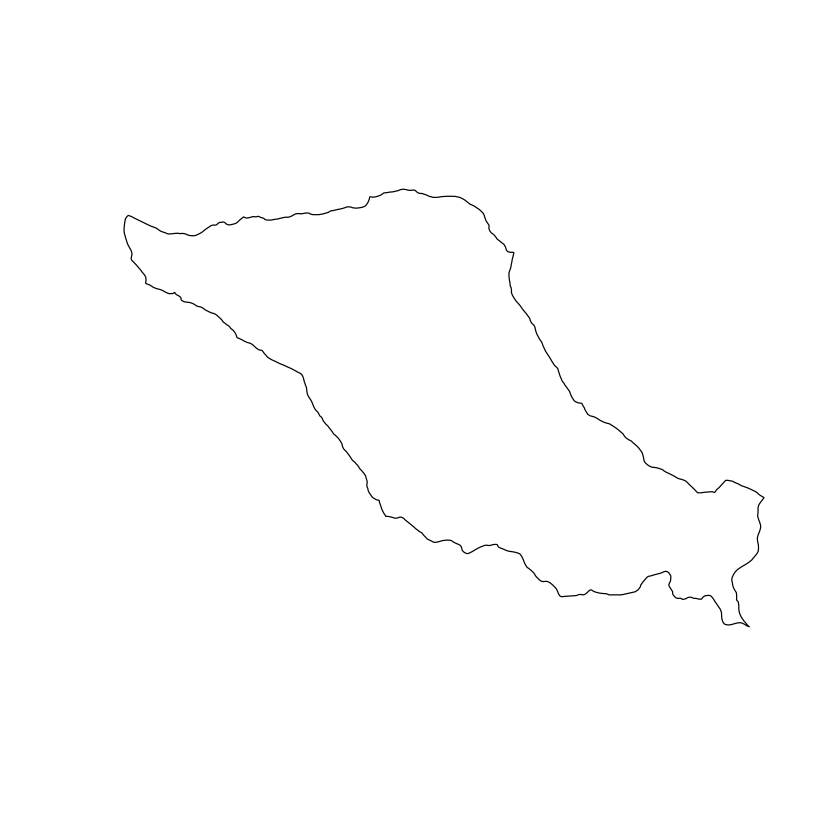

In [10]:
huc_index <- 1
plot(huc_12_gpgk[huc_index,]$geom)
print(huc_12_gpgk[huc_index,])
query_wkt <- st_as_text(huc_12_gpgk[huc_index,]$geom, crs = 4326, EWKT = TRUE)

query_sql <- paste0("SELECT * FROM hja_gedi WHERE ST_Intersects(geom,'",query_wkt,"')")
# print(query_sql)
# Connect to the PostgreSQL database
conn <- RPostgreSQL::dbConnect("PostgreSQL",
                 dbname = "jifesypi",
                 host = "mild-williams-pear.db.elephantsql.com",
                #  port = "your_port",
                 user = "jifesypi",
                 password = "Qxds23zjkpIIU343-GGHNlxqFdD3Pdlr")

gedi_sf <- st_read(conn,query=query_sql)

dbDisconnect(conn)

gedi_dt <- gedi_sf %>% data.table

gedi_dt[,geom_buffer := geom %>% st_transform('EPSG:6822') %>% st_buffer(12.5)]

landtrendr_rast <- terra::rast(landtrendr_tif)

extract_dt <-

gedi_dt[,geom_buffer] %>% st_as_sf %>%
exact_extract(landtrendr_rast,.,force_df=T,c('min','max','mean','median'))

summary_dt <- data.table(gedi_dt,extract_dt[,names(extract_dt) %>% strsplit('[.]') %>% lapply(function(x){x[[1]]}) %>% unlist %>% order])

summary_dt$agbd[summary_dt$agbd<0] <- NA

hja_2008_rast <- terra::rast(hja_2008_tif)

extract_dt <-

gedi_dt[,geom_buffer] %>% st_as_sf %>%
exact_extract(hja_2008_rast,.,force_df=T,c('min','max','mean','median'))
names(extract_dt) <- paste(c('min','max','mean','median'),'2008',sep='_')
summary_dt <- data.table(summary_dt,extract_dt[,names(extract_dt) %>% strsplit('[.]') %>% lapply(function(x){x[[1]]}) %>% unlist %>% order])

conus_2003_rast <- terra::rast(conus_2003_tif)

extract_dt <-

gedi_dt[,geom_buffer] %>% st_as_sf %>%
exact_extract(conus_2003_rast,.,force_df=T,c('min','max','mean','median'))
names(extract_dt) <- paste(c('min','max','mean','median'),"2003",sep='_')
summary_dt <- data.table(summary_dt,extract_dt[,names(extract_dt) %>% strsplit('[.]') %>% lapply(function(x){x[[1]]}) %>% unlist %>% order])

conus_2016_rast <- terra::rast(conus_2016_tif)

extract_dt <-

gedi_dt[,geom_buffer] %>% st_as_sf %>%
exact_extract(conus_2016_rast,.,force_df=T,c('min','max','mean','median'))
names(extract_dt) <- paste(c('min','max','mean','median'),"2016",sep='_')
summary_dt <- data.table(summary_dt,extract_dt[,names(extract_dt) %>% strsplit('[.]') %>% lapply(function(x){x[[1]]}) %>% unlist %>% order])

delta_time_to_timestamp <- function(delta_time) {
  # Define the reference date
  reference_date <- as.POSIXct("2018-01-01 00:00:00", tz = "UTC")

  # Add the delta_time (in seconds) to the reference date
  timestamp <- reference_date + delta_time

  return(timestamp)
}

summary_dt$year <- delta_time_to_timestamp(summary_dt$delta_time) %>% format("%Y")

# wnf_dt <- st_read('/content/wnf_history.gpkg') %>% data.table
# harvest_dt <- st_read('/content/harvest_history.gpkg') %>% data.table
# fire_dt <- st_read('/content/fire_history.gpkg') %>% data.table

# summary_dt$wnf_year <-  wnf_dt$YR_ORIGIN[st_intersects(summary_dt$geom,wnf_dt$geom %>% st_transform(st_crs(summary_dt$geom)) %>%st_make_valid) %>% lapply(function(x){x[1]}) %>% unlist]

# summary_dt$wnf_stand <-  wnf_dt$STAND[st_intersects(summary_dt$geom,wnf_dt$geom %>% st_transform(st_crs(summary_dt$geom)) %>%st_make_valid) %>% lapply(function(x){x[1]}) %>% unlist]

# summary_dt$harvest_stand <-  harvest_dt$STAND[st_intersects(summary_dt$geom,harvest_dt$geom %>% st_transform(st_crs(summary_dt$geom))) %>% lapply(function(x){x[1]}) %>% unlist]

# summary_dt$harvest_year <-  harvest_dt$YR_ORIGIN[st_intersects(summary_dt$geom,harvest_dt$geom %>% st_transform(st_crs(summary_dt$geom))) %>% lapply(function(x){x[1]}) %>% unlist]

# summary_dt$stand <-  harvest_dt$STAND[st_intersects(summary_dt$geom,harvest_dt$geom %>% st_transform(st_crs(summary_dt$geom))) %>% lapply(function(x){x[1]}) %>% unlist]


# summary_dt$fire_year <- st_intersects(summary_dt$geom,fire_dt$geom %>% st_transform(st_crs(summary_dt$geom))) %>% lapply(function(x){max(fire_dt$EPISODE[x])}) %>% unlist%>% as.numeric

# summary_dt$fire_mean <- st_intersects(summary_dt$geom,fire_dt$geom %>% st_transform(st_crs(summary_dt$geom))) %>% lapply(function(x){mean(fire_dt$EPISODE[x][fire_dt$EPISODE[x]>1800])}) %>% unlist%>% as.numeric

summary_dt$HUC8 <- huc_8_gpgk$HUC8[st_intersects(summary_dt$geom,huc_8_gpgk) %>% lapply(function(x){x[1]}) %>% unlist]

summary_dt$HUC10 <- huc_10_gpgk$HUC10[st_intersects(summary_dt$geom,huc_10_gpgk) %>% lapply(function(x){x[1]}) %>% unlist]

summary_dt$HUC12 <- huc_12_gpgk$HUC12[st_intersects(summary_dt$geom,huc_12_gpgk) %>% lapply(function(x){x[1]}) %>% unlist]




Simple feature collection with 1 feature and 20 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.2615 ymin: 44.19872 xmax: -122.1017 ymax: 44.28133
Geodetic CRS:  WGS 84
   OBJECTID                                  TNMID MetaSourceID SourceDataDesc
91     3160 {1472BA10-5C01-437A-8AAF-A4611746157E}         <NA>           <NA>
   SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
91             <NA>            <NA> 2013-01-18 07:09:30      NA  15735.63
   AreaSqKm States        HUC12          Name HUType HUMod        ToHUC
91    63.68     OR 170900040401 Lookout Creek      S    NM 170900040403
   NonContributingAreaAcres NonContributingAreaSqKm Shape_Length  Shape_Area
91                        0                       0    0.4294817 0.007173278
                             geom
91 MULTIPOLYGON (((-122.1097 4...


[1] TRUE

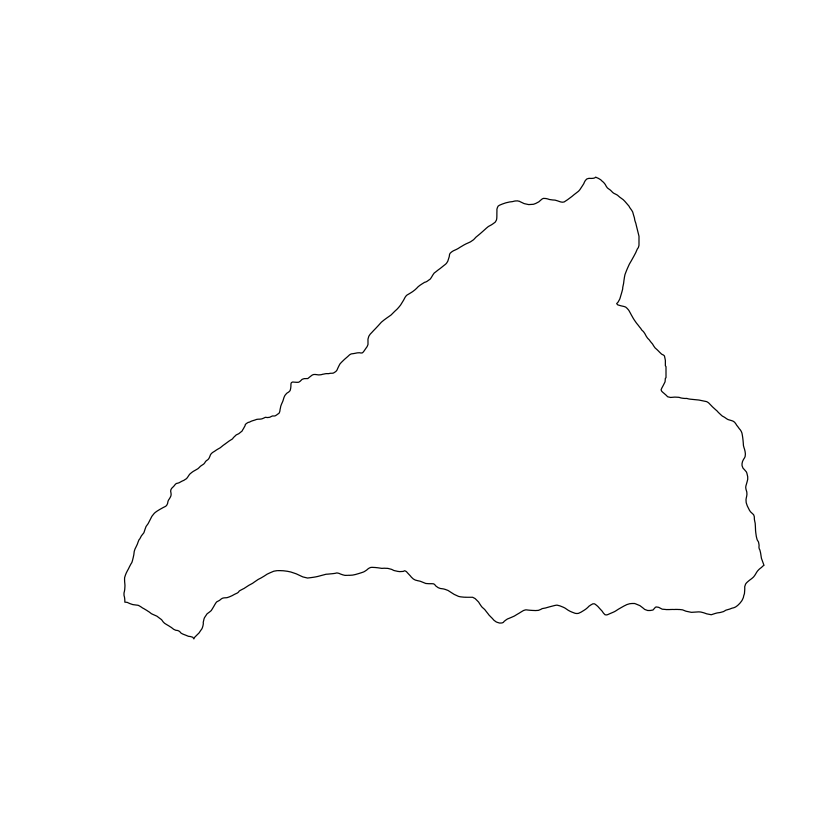

In [43]:
huc_index <- 91
plot(huc_12_gpgk[huc_index,]$geom)
print(huc_12_gpgk[huc_index,])
query_wkt <- st_as_text(huc_12_gpgk[huc_index,]$geom, crs = 4326, EWKT = TRUE)

query_sql <- paste0("SELECT * FROM hja_gedi WHERE ST_Intersects(geom,'",query_wkt,"')")
# print(query_sql)
# Connect to the PostgreSQL database
conn <- RPostgreSQL::dbConnect("PostgreSQL",
                 dbname = "jifesypi",
                 host = "mild-williams-pear.db.elephantsql.com",
                #  port = "your_port",
                 user = "jifesypi",
                 password = "Qxds23zjkpIIU343-GGHNlxqFdD3Pdlr")

gedi_sf <- st_read(conn,query=query_sql)

dbDisconnect(conn)

In [69]:
zip(zipfile = "/content/HUC_Intersection_Set.zip", files = "/content/HUC_Intersection_Set")


In [70]:
target_folder <- drive_get(id = "1TEwKlKPr8KQPa-IvjCEa2lBeTG1TR-A0")
drive_upload(media =  "/content/HUC_Intersection_Set.zip", path = target_folder, name = "HUC_Intersection_Set.zip", overwrite = TRUE)

The googledrive package is requesting access to your Google account.
Enter '1' to start a new auth process or select a pre-authorized account.
1: Send me to the browser for a new auth process.
2: seismosmsr@gmail.com


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=8f0027fdf85727c88927793367720075&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWRldTVCVUx2N2d5MnhyMy1qLVY1VGpMLVl1bFRvVzQwNGFpNlR3cHdWS2tRcEZlRU5VbUVadnJEdmkzRW54bHhfWmJ2QSIsInN0YXRlIjoiOGYwMDI3ZmRmODU3MjdjODg5Mjc3OTMzNjc3MjAwNzUifQ==


Local file:

• /content/HUC_Intersection_Set.zip

Uploaded into Drive file:

• HUC_Intersection_Set.zip <id: 1rIueY7IXML2Gu06MR2pijfgqOFydKTzh>

With MIME type:

• application/zip



In [22]:
gedi_dt <- gedi_sf %>% data.table
gedi_dt %>% nrow
gedi_dt[l4_quality_flag ==1,] %>% nrow

[1] 19243

[1] 5368

In [22]:
# landtrendr_tif[landtrendr_tif < 0] <- NA

In [23]:
gedi_dt[,geom_buffer := geom %>% st_transform('EPSG:6822') %>% st_buffer(12.5)]
#consider 12.5

In [24]:
paste(c('min','max','mean','median'),'2008',sep='_')

[1] "min_2008"    "max_2008"    "mean_2008"   "median_2008"

In [25]:
landtrendr_rast <- terra::rast(landtrendr_tif)

extract_dt <-

gedi_dt[,geom_buffer] %>% st_as_sf %>%
exact_extract(landtrendr_rast,.,force_df=T,c('min','max','mean','median'))



Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


In [26]:
summary_dt <- data.table(gedi_dt,extract_dt[,names(extract_dt) %>% strsplit('[.]') %>% lapply(function(x){x[[1]]}) %>% unlist %>% order])

In [27]:
summary_dt$agbd[summary_dt$agbd<0] <- NA

In [28]:
hja_2008_rast <- terra::rast(hja_2008_tif)

extract_dt <-

gedi_dt[,geom_buffer] %>% st_as_sf %>%
exact_extract(hja_2008_rast,.,force_df=T,c('min','max','mean','median'))
names(extract_dt) <- paste(c('min','max','mean','median'),'2008',sep='_')
summary_dt <- data.table(summary_dt,extract_dt[,names(extract_dt) %>% strsplit('[.]') %>% lapply(function(x){x[[1]]}) %>% unlist %>% order])

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


In [29]:
conus_2003_rast <- terra::rast(conus_2003_tif)

extract_dt <-

gedi_dt[,geom_buffer] %>% st_as_sf %>%
exact_extract(conus_2003_rast,.,force_df=T,c('min','max','mean','median'))
names(extract_dt) <- paste(c('min','max','mean','median'),"2003",sep='_')
summary_dt <- data.table(summary_dt,extract_dt[,names(extract_dt) %>% strsplit('[.]') %>% lapply(function(x){x[[1]]}) %>% unlist %>% order])

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


In [30]:
conus_2016_rast <- terra::rast(conus_2016_tif)

extract_dt <-

gedi_dt[,geom_buffer] %>% st_as_sf %>%
exact_extract(conus_2016_rast,.,force_df=T,c('min','max','mean','median'))
names(extract_dt) <- paste(c('min','max','mean','median'),"2016",sep='_')
summary_dt <- data.table(summary_dt,extract_dt[,names(extract_dt) %>% strsplit('[.]') %>% lapply(function(x){x[[1]]}) %>% unlist %>% order])

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


In [31]:
delta_time_to_timestamp <- function(delta_time) {
  # Define the reference date
  reference_date <- as.POSIXct("2018-01-01 00:00:00", tz = "UTC")

  # Add the delta_time (in seconds) to the reference date
  timestamp <- reference_date + delta_time

  return(timestamp)
}

In [32]:
summary_dt %>% names

[1] "agbd"               "lat_lowestmode"     "lon_lowestmode"    
 [4] "agbd_pi_lower"      "agbd_pi_upper"      "agbd_se"           
 [7] "agbd_t"             "agbd_t_se"          "algorithm_run_flag"
[10] "channel"            "degrade_flag"       "delta_time"        
[13] "elev_lowestmode"    "l2_quality_flag"    "l4_quality_flag"   
[16] "geom"               "geom_buffer"        "max.yod"           
[19] "max.mag"            "max.dur"            "max.preval"        
[22] "max.rate"           "max.dsnr"           "mean.yod"          
[25] "mean.mag"           "mean.dur"           "mean.preval"       
[28] "mean.rate"          "mean.dsnr"          "median.yod"        
[31] "median.mag"         "median.dur"         "median.preval"     
[34] "median.rate"        "median.dsnr"        "min.yod"           
[37] "min.mag"            "min.dur"            "min.preval"        
[40] "min.rate"           "min.dsnr"           "max_2008"          
[43] "mean_2008"          "median_2008"        "min_2008"          
[46] "max_2003"           "mean_2003"          "median_2003"       
[49] "min_2003"           "max_2016"           "mean_2016"         
[52] "median_2016"        "min_2016"

In [33]:
summary_dt$year <- delta_time_to_timestamp(summary_dt$delta_time) %>% format("%Y")

In [34]:
wnf_dt <- st_read('/content/wnf_history.gpkg') %>% data.table
harvest_dt <- st_read('/content/harvest_history.gpkg') %>% data.table
fire_dt <- st_read('/content/fire_history.gpkg') %>% data.table

Reading layer `clip_wnfveg6' from data source `/content/wnf_history.gpkg' using driver `GPKG'
Simple feature collection with 7769 features and 24 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 549437.5 ymin: 4885711 xmax: 580195.5 ymax: 4928056
Projected CRS: NAD83 / UTM zone 10N
Reading layer `harvest_sites' from data source `/content/harvest_history.gpkg' using driver `GPKG'
Simple feature collection with 161 features and 32 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 559006.2 ymin: 4894211 xmax: 571764.6 ymax: 4903300
Projected CRS: NAD83 / UTM zone 10N
Reading layer `firehistory_region' from data source `/content/fire_history.gpkg' using driver `GPKG'
Simple feature collection with 258 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 558647.1 ymin: 4893922 xmax: 575297.1 ymax: 4906316
Projected CRS: NAD83 / UTM zone 10N


In [35]:
wnf_dt %>% names

[1] "AREA"       "PERIMETER"  "VEG6_"      "VEG6_ID"    "STAND"     
 [6] "DISTRICT"   "VEG_NONVEG" "YR_ORIGIN"  "SIZE_CLASS" "SPECIES1"  
[11] "SPECIES2"   "NUM_LAYERS" "OVRSTRY_CT" "OVRSTRY_YR" "PARTIAL_CT"
[16] "PARTIAL_YR" "COM_THN_YR" "SPECT_TYPE" "TIMBER_TYP" "COND_CLASS"
[21] "HAB_FEATUR" "CVR_PCT_TR" "PLANT_ASSC" "ECOCLASS"   "geom"

In [36]:
summary_dt$wnf_year <-  wnf_dt$YR_ORIGIN[st_intersects(summary_dt$geom,wnf_dt$geom %>% st_transform(st_crs(summary_dt$geom)) %>%st_make_valid) %>% lapply(function(x){x[1]}) %>% unlist]

summary_dt$wnf_stand <-  wnf_dt$STAND[st_intersects(summary_dt$geom,wnf_dt$geom %>% st_transform(st_crs(summary_dt$geom)) %>%st_make_valid) %>% lapply(function(x){x[1]}) %>% unlist]

summary_dt$harvest_stand <-  harvest_dt$STAND[st_intersects(summary_dt$geom,harvest_dt$geom %>% st_transform(st_crs(summary_dt$geom))) %>% lapply(function(x){x[1]}) %>% unlist]

summary_dt$harvest_year <-  harvest_dt$YR_ORIGIN[st_intersects(summary_dt$geom,harvest_dt$geom %>% st_transform(st_crs(summary_dt$geom))) %>% lapply(function(x){x[1]}) %>% unlist]

summary_dt$stand <-  harvest_dt$STAND[st_intersects(summary_dt$geom,harvest_dt$geom %>% st_transform(st_crs(summary_dt$geom))) %>% lapply(function(x){x[1]}) %>% unlist]


summary_dt$fire_year <- st_intersects(summary_dt$geom,fire_dt$geom %>% st_transform(st_crs(summary_dt$geom))) %>% lapply(function(x){max(fire_dt$EPISODE[x])}) %>% unlist%>% as.numeric

summary_dt$fire_mean <- st_intersects(summary_dt$geom,fire_dt$geom %>% st_transform(st_crs(summary_dt$geom))) %>% lapply(function(x){mean(fire_dt$EPISODE[x][fire_dt$EPISODE[x]>1800])}) %>% unlist%>% as.numeric

Warning message in max(fire_dt$EPISODE[x]):
“no non-missing arguments to max; returning -Inf”
Warning message in max(fire_dt$EPISODE[x]):
“no non-missing arguments to max; returning -Inf”
Warning message in max(fire_dt$EPISODE[x]):
“no non-missing arguments to max; returning -Inf”
Warning message in max(fire_dt$EPISODE[x]):
“no non-missing arguments to max; returning -Inf”
Warning message in max(fire_dt$EPISODE[x]):
“no non-missing arguments to max; returning -Inf”
Warning message in max(fire_dt$EPISODE[x]):
“no non-missing arguments to max; returning -Inf”
Warning message in max(fire_dt$EPISODE[x]):
“no non-missing arguments to max; returning -Inf”
Warning message in max(fire_dt$EPISODE[x]):
“no non-missing arguments to max; returning -Inf”
Warning message in max(fire_dt$EPISODE[x]):
“no non-missing arguments to max; returning -Inf”
Warning message in max(fire_dt$EPISODE[x]):
“no non-missing arguments to max; returning -Inf”
Warning message in max(fire_dt$EPISODE[x]):
“no non-missing 

In [37]:
summary_dt %>%head


agbd,lat_lowestmode,lon_lowestmode,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,algorithm_run_flag,channel,⋯,median_2016,min_2016,year,wnf_year,wnf_stand,harvest_stand,harvest_year,stand,fire_year,fire_mean
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
358.3119,44.20733,-122.1435,180.72018,596.0941,11.11314,18.81161,3.312940,1,0,⋯,368.8161,313,2019,1836,1000969,NA,NA,NA,1893,1836.25
299.8270,44.20761,-122.1429,139.90482,519.9716,11.11908,17.20801,3.313826,1,0,⋯,106.0000,88,2019,1836,1000969,NA,NA,NA,1893,1836.25
107.9718,44.20788,-122.1423,24.09316,251.9652,11.09920,10.32643,3.310863,1,0,⋯,231.0090,76,2019,1836,1000969,NA,NA,NA,1893,1836.80
289.1076,44.20815,-122.1417,132.67433,505.7054,11.10837,16.89760,3.312229,1,0,⋯,464.8378,402,2019,1532,1000877,NA,NA,NA,1893,1836.80
253.7462,44.20842,-122.1411,109.10674,458.5341,11.10539,15.83052,3.311786,1,0,⋯,499.0751,455,2019,1532,1000877,NA,NA,NA,1893,1836.80
383.3972,44.20868,-122.1405,198.63158,628.3741,11.11699,19.45897,3.313515,1,0,⋯,410.5171,392,2019,1532,1000877,NA,NA,NA,1893,1836.80


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 241 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 241 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 241 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 241 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 241 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 241 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 241 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 241 rows containing missing values (`geom_point()`).”


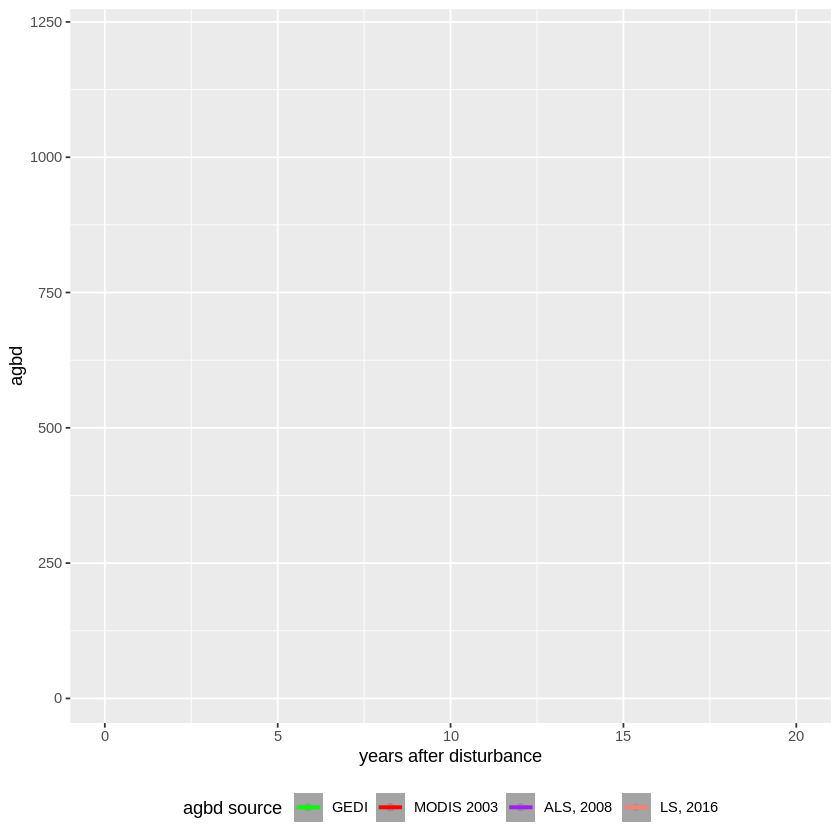

In [38]:
summary_dt[!is.na(agbd),][,list(agbd = mean(agbd,na.rm=T),mean_2003 = mean(mean_2003,na.rm=T),mean_2008 = mean(mean_2008,na.rm=T),mean_2016 = mean(mean_2016,na.rm=T)),by=.(wnf_year,year)] %>%
  ggplot(aes(x=2023-wnf_year,y=agbd,color='GEDI' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))))+
  geom_point( ) +
  geom_point(aes(y=mean_2003,color='MODIS 2003' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  geom_point(aes(y=mean_2008,color='ALS, 2008' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016')))  ) +
  geom_point(aes(y=mean_2016,color='LS, 2016' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016')))  )+
  # geom_abline(color='red') +
  geom_smooth( ) +
  geom_smooth(aes(y=mean_2003,color='MODIS 2003' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  geom_smooth(aes(y=mean_2008,color='ALS, 2008' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  geom_smooth(aes(y=mean_2016,color='LS, 2016' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  # Hide the annotations
  # Manually add custom legend
  xlim(0,20)+
  xlab('years after disturbance')+
  scale_color_manual(
    values = c('GEDI' = 'green', 'MODIS 2003' = 'red', 'ALS, 2008' = 'purple', 'LS, 2016' = 'salmon'),
    name = 'agbd source',  # Changing the name of the legend here
    breaks = c('GEDI','MODIS 2003','ALS, 2008','LS, 2016'),
    labels = c('GEDI', 'MODIS 2003', 'ALS, 2008','LS, 2016'),
    position = 'bottom') +
  theme(legend.position = 'bottom')

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


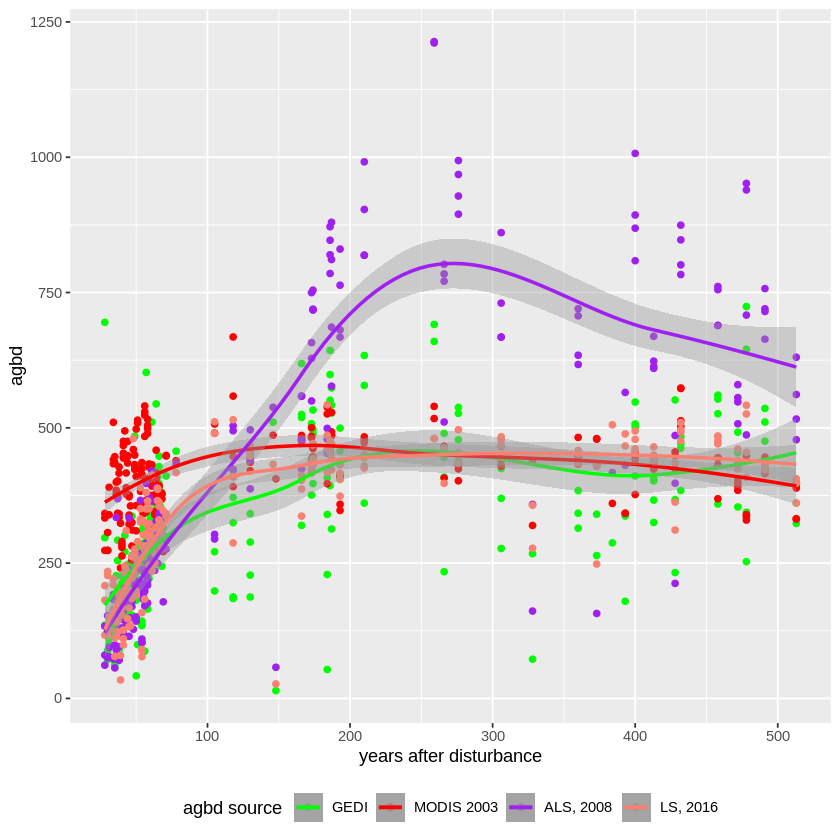

In [42]:
summary_dt[!is.na(mean_2008) &!is.na(agbd) & wnf_year >1500  ,][,list(agbd = mean(agbd,na.rm=T),mean_2003 = mean(mean_2003,na.rm=T),mean_2008 = mean(mean_2008,na.rm=T),mean_2016 = mean(mean_2016,na.rm=T)),by=.(wnf_year,year)] %>%
  ggplot(aes(x=2023-wnf_year,y=agbd,color='GEDI' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))))+
  geom_point( ) +
  geom_point(aes(y=mean_2003,color='MODIS 2003' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  geom_point(aes(y=mean_2008,color='ALS, 2008' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016')))  ) +
  geom_point(aes(y=mean_2016,color='LS, 2016' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016')))  )+
  # geom_abline(color='red') +
  geom_smooth( ) +
  geom_smooth(aes(y=mean_2003,color='MODIS 2003' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  geom_smooth(aes(y=mean_2008,color='ALS, 2008' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  geom_smooth(aes(y=mean_2016,color='LS, 2016' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  # Hide the annotations
  # Manually add custom legend
  xlab('years after disturbance')+
  scale_color_manual(
    values = c('GEDI' = 'green', 'MODIS 2003' = 'red', 'ALS, 2008' = 'purple', 'LS, 2016' = 'salmon'),
    name = 'agbd source',  # Changing the name of the legend here
    breaks = c('GEDI','MODIS 2003','ALS, 2008','LS, 2016'),
    labels = c('GEDI', 'MODIS 2003', 'ALS, 2008','LS, 2016'),
    position = 'bottom') +
  theme(legend.position = 'bottom')

In [41]:
year_off <- 1

agbd_preval_lm <-
summary_dt[l4_quality_flag ==1 & min.yod>1984 & round(min.yod) == (year %>% as.numeric-year_off) & round(max.yod) == (year %>% as.numeric-year_off),][,agbd_group:= round(min.preval,-1)][,agbd_group:= round(min.preval,-2)][,mag_group:= round(min.mag,-2)][,yod_group:= round(2023 - min.yod)][,list(min.preval = mean(mean.preval,na.rm=T),min.mag= mean(mean.mag,na.rm=T),agbd= mean(agbd,na.rm=T)),by=c('agbd_group','mag_group','yod_group')][,min.endval:=(min.preval-min.mag)] %>%
  lm(agbd~min.endval,.)

summary_dt$agbd_postval <- predict(agbd_preval_lm,summary_dt[,min.endval:=(min.preval-min.mag)])
summary_dt[min.preval ==0]$agbd_postval <-NA

summary_dt$agbd_preval <- predict(agbd_preval_lm,summary_dt[,min.endval:=(min.preval)])
summary_dt[min.preval ==0]$agbd_preval <-NA

ERROR: ignored

In [ ]:
fire_history_gpkg <- st_read('/content/Fire_History_polygon.gpkg')

In [ ]:
fire_history_gpkg <- fire_history_gpkg %>% st_cast('POLYGON')

In [ ]:
fire_history_int <- summary_dt %>% st_as_sf %>% st_intersects(fire_history_gpkg %>% st_transform(st_crs(summary_dt$geom)))

In [ ]:
(fire_history_int %>% unlist)[1:5]

In [49]:
huc_8_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_8_gpgk)

huc_10_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_10_gpgk)

huc_12_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_12_gpgk)

In [ ]:
fire_history_gpkg %>% data.table %>% head %>% names


In [ ]:
fire_summary_dt <- data.table(summary_dt, (fire_history_gpkg %>% data.table)[,c('FIRE_NUM','FIRE_CODE','FIRE_NAME','FIRE_YEAR')][fire_history_int %>% lapply(function(x){x[1]}) %>% unlist,])


In [ ]:
fire_summary_dt$FIRE_YEAR %>% table

In [ ]:
# huc_8_summary_dt

In [ ]:
huc_8_summary_dt <- data.table(summary_dt, (huc_8_gpgk %>% data.table)[,c('TNMID','HUC8','Name')][huc_8_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_10_summary_dt <- data.table(summary_dt, (huc_10_gpgk %>% data.table)[,c('TNMID','HUC10','Name')][huc_10_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_12_summary_dt <- data.table(summary_dt, (huc_12_gpgk %>% data.table)[,c('TNMID','HUC12','Name')][huc_12_int %>% lapply(function(x){x[1]}) %>% unlist,])

In [ ]:
# # resample_dt[,agbd := rnorm(1,agbd,agbd_se),by=row_id]
# # gc()
# resamp_vec <-
# 1:nrow(resample_dt) %>%
#   lapply(function(x){
#     if(!is.na())
#     rnorm(1,resample_dt$agbd[[x]],resample_dt$agbd_sd[[x]])
#   })
resample_dt <- NULL
gc()

In [ ]:
summary_dt[,group_quantile:=as.integer(cut(agbd_postval, breaks = quantile(agbd_postval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) ]
summary_dt$group <- NA
# summary_dt[!is.na(agbd) & median.preval > 0, group_quantile := kmeans(((median.preval - median.mag) / median.preval)[.I], centers = 4)$cluster]



summary_dt$group <- NA
summary_dt[!is.na(agbd_postval), group := kmeans((agbd_postval)[.I], centers = 3)$cluster]


cluster_dt <- summary_dt[!is.na(agbd) & median.preval > 0,list(agbd_postval = mean(agbd_postval)),by=group][order(agbd_postval)]
cluster_dt$group_new <- 1:nrow(cluster_dt)
cluster_dt <- cluster_dt[order(group)]
# print(cluster_dt)
summary_dt$group <- cluster_dt$group_new[summary_dt$group]

summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group_quantile][order(agbd_postval)]

summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group][order(agbd_postval)]

In [ ]:
install.packages('randomForest')

In [ ]:
library(randomForest)

In [ ]:
calibration_dt[,group_quantile:=as.integer(cut(mean.preval-mean.mag, breaks = quantile((mean.preval-mean.mag)[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE))  %>%as.factor()]

calibration_dt %>%
  ggplot(aes(x = mean.preval-mean.mag,y=agbd))+
  geom_point(aes(color=group_quantile))

In [ ]:
calibration_dt <- resample_dt[min.yod>1984 & !is.na(agbd) ,]
calibration_dt$id <- 1:nrow(calibration_dt)
calibration_dt[,post_val := mean(mean.preval - mean.mag),by = id]
# calibration_dt[,group_quantile:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]
# calibration_dt[,agbd_quantile:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]
# calibration_dt[,postval_quantile:=as.integer(cut(mean.preval - mean.mag, breaks = quantile(mean.preval - mean.mag, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]


# calibration_dt %>%
#   ggplot(aes(x=agbd))+
#   geom_boxplot(aes(color=postval_quantile))
# names(calibration_dt)
# rf_form <- as.formula(paste('group_quantile ~',c('post_val',(calibration_dt %>% names)[18:41]) %>% paste(.,collapse = '+')))
# resample_dt$id <- 1:nrow(resample_dt)

# resample_dt[,agbd_quantile:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]
# resample_dt[,postval_quantile:=as.integer(cut(mean.preval - mean.mag, breaks = quantile(mean.preval - mean.mag, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]

# resample_dt[,post_val := mean(mean.preval - mean.mag),by = id]
# rf_result <-  randomForest(rf_form,resample_dt[min.yod>1984 & !is.na(agbd)])


In [ ]:
while(TRUE){}

In [ ]:
post_gedi_dt %>%head

In [ ]:
resample_dt[,group:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)),by = .(round(median.yod/5)*5)]

# table(resample_dt$group,round(resample_dt$median.yod /1)*1)

In [ ]:
fire_summary_dt$gedi_era <-  fire_summary_dt$min.yod > min(fire_summary_dt$year %>% as.numeric)

fire_summary_dt$post_gedi <-  (fire_summary_dt$year %>% as.numeric) - fire_summary_dt$mean.yod

# fire_summary_dt$pre_gedi <-

In [ ]:
post_gedi_dt <- fire_summary_dt[l4_quality_flag ==1 & min.yod>1984 & gedi_era  ]
post_gedi_dt[agbd >0 &year %>% as.numeric == round(mean.yod+1) |year %>% as.numeric == round(mean.yod+1) | year %>% as.numeric == round(mean.yod+2)| year %>% as.numeric == round(mean.yod+3)| year %>% as.numeric == round(mean.yod+4)| year %>% as.numeric == round(mean.yod+5)]    %>%
  ggplot(aes(y=agbd,x=mean.preval-mean.mag))+
  geom_bin2d()+
  geom_smooth(method='lm')

In [ ]:
fire_summary_dt$gedi_era %>% table

In [ ]:
# 1:1000
resample_dt <- fire_summary_dt
# resample_dt <- fire_summary_dt[min.yod>1984 & !is.na(agbd) & is.na(FIRE_YEAR) & l4_quality_flag ==1 &min.endval>0]

# resample_dt %>% head


# agbd_preval_lm <-resample_dt[] %>%
#   lm(agbd~min.endval,.)

# agbd_preval_lm %>% summary

resample_dt$agbd_postval <- predict(agbd_preval_lm,resample_dt[,min.endval:=(min.preval-min.mag)])
resample_dt$agbd_preval <- predict(agbd_preval_lm,resample_dt[,min.endval:=(min.preval)])

# min.yod>1984 & round(min.yod) %in% c(round(year %>% as.numeric)-c(1,2)) &  round(max.yod) %in% c(round(year%>% as.numeric)-c(1,2))
resample_dt[,min.endval:=(min.preval-min.mag)]
# resample_dt$min.endval
# # resample_dt$agbd_postval
# # resample_dt[,agbd_postval:=mean(agbd[min.yod>1984 & round(min.yod) %in% c(round(year %>% as.numeric)+c(1,2)) &  round(max.yod) %in% c(round(year%>% as.numeric)+c(1,2))],na.rm=T),by = group]
# # resample_dt[,agbd_preval:=mean(agbd[min.yod>1984 & round(min.yod) %in% c(round(year %>% as.numeric)+c(1,2)) &  round(max.yod) %in% c(round(year%>% as.numeric)+c(1,2))],na.rm=T),by = group]
resample_dt[,group:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) ]

resample_dt[,group_agbd_preval:=mean(agbd[min.yod>1984 & round(mean.yod) %in% c(round(year %>% as.numeric)+c(1,2,3))],na.rm=T) ,by=group]

resample_dt[,group_agbd_postval:=mean(agbd[min.yod>1984 & round(mean.yod) < round(year %>% as.numeric) ],na.rm=T) ,by=group]


plot_dt <- resample_dt[min.yod>1984 &l4_quality_flag ==1,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd,na.rm=T),yad = mean(2023-mean.yod),group_agbd_preval=mean(group_agbd_preval,na.rm=T),group_agbd_postval=mean(group_agbd_postval,na.rm=T),n = length(mean.yod)),by = .(group,yod_round)][yad>1]


plot_dt[,agbd_yr:=(agbd/yad),by=group]

plot_dt[order(yad),agbd_yr_cumsum := cumsum(agbd/yad)-group_agbd_postval,by = group]

# summary_dt[,group_quantile:=as.integer(cut(agbd_postval, breaks = quantile(agbd_postval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) ]
# summary_dt$group <- NA
# # summary_dt[!is.na(agbd) & median.preval > 0, group_quantile := kmeans(((median.preval - median.mag) / median.preval)[.I], centers = 4)$cluster]



# summary_dt$group <- NA
# summary_dt[!is.na(agbd_postval), group := kmeans((agbd_postval)[.I], centers = 3)$cluster]


# cluster_dt <- summary_dt[!is.na(agbd) & median.preval > 0,list(agbd_postval = mean(agbd_postval)),by=group][order(agbd_postval)]
# cluster_dt$group_new <- 1:nrow(cluster_dt)
# cluster_dt <- cluster_dt[order(group)]
# # print(cluster_dt)
# summary_dt$group <- cluster_dt$group_new[summary_dt$group]

# summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group_quantile][order(agbd_postval)]

# summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group][order(agbd_postval)]

plot_dt$yod %>% max

plot_dt %>%

ggplot(aes(x=yad,y=agbd_yr,group=group))+

geom_point()+

geom_smooth(aes(color=group))


# plot_dt %>%
# ggplot(aes(x=yad,y=agbd_yr_cumsum,group=group_quantile))+
# geom_point()+
# geom_line(aes(color=group_quantile))
# geom_smooth(data=pred_dt,aes(),color='red')

In [ ]:
gedi_vec_gpkg$area <- st_area(gedi_vec_gpkg)

summary_dt$gedi_clust <- st_intersects(summary_dt$geom,gedi_vec_gpkg) %>% lapply(function(x){x[1]}) %>% unlist
summary_dt$gedi_clust_area <- gedi_vec_gpkg$area[summary_dt$gedi_clust]

In [ ]:
summary_dt[min.yod > 1984 & agbd>0 &l4_quality_flag ==1,] %>%
  ggplot(aes(y=(agbd - agbd_preval)/(2023-max.yod),x=max.yod,group=group))+
  geom_point() +
  # geom_line(aes(color=group))+
  geom_smooth(aes(color=group))

In [ ]:
huc_8_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_8_gpgk)

huc_10_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_10_gpgk)

huc_12_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_12_gpgk)

In [ ]:
huc_8_summary_dt <- data.table(summary_dt, (huc_8_gpgk %>% data.table)[,c('TNMID','HUC8','Name')][huc_8_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_10_summary_dt <- data.table(summary_dt, (huc_10_gpgk %>% data.table)[,c('TNMID','HUC10','Name')][huc_10_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_12_summary_dt <- data.table(summary_dt, (huc_12_gpgk %>% data.table)[,c('TNMID','HUC12','Name')][huc_12_int %>% lapply(function(x){x[1]}) %>% unlist,])

In [ ]:
targ_dt <- huc_10_summary_dt[Name == 'Thomas Creek' & group ==1]

loess_dt <- huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3]

huc_10_summary_dt[,yad := 2023-mean.yod]
targ_dt$agbd_pred <-
predict(loess_dt[Name == 'Thomas Creek' & group == 1] %>%
  loess(agbd~yad,.), targ_dt)

In [ ]:
targ_dt[yad>3,] %>%
  ggplot(aes(x=agbd_pred-agbd))+
  geom_histogram(bins=100)

In [ ]:
targ_dt[yad>3,] %>% st_as_sf() %>% st_write('/content/example.gpkg')

In [ ]:
huc_10_dist_table <- huc_10_summary_dt$Name %>% table
huc_10_summary_dt <- huc_10_summary_dt[Name %in% c(huc_10_dist_table[huc_10_dist_table>100] %>% names),]

huc_10_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']



fit <- loess(y ~ x)
predictions <- predict(fit, newdata = data.frame(x = x))

huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)


In [ ]:
huc_12_dist_table <- huc_12_summary_dt$Name %>% table
huc_12_summary_dt <- huc_12_summary_dt[Name %in% c(huc_12_dist_table[huc_12_dist_table>100] %>% names),]

huc_12_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']





huc_12_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)